<a href="https://colab.research.google.com/github/hilmanrozaini/UKM_SDA/blob/main/Assgn2_Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**ASSIGNMENT 2 : STQD6324 Data Management**
##Question 2 : *Airline on-time performance*

---




    Prepared By :
    Muhammad Hilman Bin Rozaini
    Nur Mardhiah Bt Zulkhairi
    Syed Norman Daniel Bin Syed Mahadir
    Tan Su Rong
    Tan Ting Fui

#**Introduction**
---

The airline industry's on-time performance is one of critical factor that affecting traveller's flight experiences. The data used in this project to figure out the airline on-time performance is the flight dataset in the first four months of 2008 for all commercial flights within the USA. The main dataset contains 29 variables related to basic flights information and the details of the delays and cancellations. Basic flights information includes 'Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut', 'Cancelled' and 'Diverted' while 'ArrDelay', 'DepDelay', 'CancellationCode', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay' and 'LateAircraftDelay' are the details of the delays and cancellations.

#**Objectives**

---

The objectives of the study include:
*   To explore the flight patterns of the first four-month periods
*   To analyse the delay factors and the effects on the flights
*   To identify the factors of flight cancellation










#**Data Source**

---
The project data is downloaded from the website https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/HG7NV7 redirected from http://stat-computing.org/dataexpo/2009/. "2008.csv.bz2" is the main reference of data with "plane-data.csv" as the supporting data.


# **Data Pre-processing**

---

The 2008 flight dataset is split into three subsets to differentiate the complete flights, cancelled flights and the diverted flights.

Complete flights manage to depart and reach the destinations of scheduled routes. Cancelled flights refer to failed flight operations. Diverted flights depart but turn back to origin or land in airports different from the scheduled destinations.

In [ ]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# load the data - 2008.csv.bz2
data = pd.read_csv("/content/drive/MyDrive/2008.csv.bz2")
data

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,1343.0,1325,1451.0,1435,WN,588,...,4.0,9.0,0,NaN,0,16.0,0.0,0.0,0.0,0.0
1,2008,1,3,4,1125.0,1120,1247.0,1245,WN,1343,...,3.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,2009.0,2015,2136.0,2140,WN,3841,...,2.0,14.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,903.0,855,1203.0,1205,WN,3,...,5.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1423.0,1400,1726.0,1710,WN,25,...,6.0,10.0,0,NaN,0,16.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2389212,2008,4,17,4,1025.0,1025,1234.0,1237,DL,1207,...,5.0,16.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2389213,2008,4,17,4,1319.0,1320,1527.0,1524,DL,1208,...,9.0,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2389214,2008,4,17,4,1335.0,1335,1556.0,1553,DL,1209,...,7.0,31.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2389215,2008,4,17,4,1933.0,1935,2140.0,2141,DL,1210,...,9.0,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [ ]:
# The dataset involves only the months from January until April
data["Month"].unique()

array([1, 2, 3, 4])

In [ ]:
# check for missing data in each column
data.isnull().sum()

Year                       0
Month                      0
DayofMonth                 0
DayOfWeek                  0
DepTime                64442
CRSDepTime                 0
ArrTime                70096
CRSArrTime                 0
UniqueCarrier              0
FlightNum                  0
TailNum                42452
ActualElapsedTime      70096
CRSElapsedTime           407
AirTime                70096
ArrDelay               70096
DepDelay               64442
Origin                     0
Dest                       0
Distance                   0
TaxiIn                 70096
TaxiOut                64442
Cancelled                  0
CancellationCode     2324775
Diverted                   0
CarrierDelay         1804634
WeatherDelay         1804634
NASDelay             1804634
SecurityDelay        1804634
LateAircraftDelay    1804634
dtype: int64

In [ ]:
# There are Time marked as 2400 noticed
# It will be a problem to convert into datetime data
# It is actually refer to 0000 hours (12.00 am)
# Replace all 2400.0 to 0 to make it easier for next pre-processing work
data['DepTime'] = data['DepTime'].replace(2400.0,0)
data['CRSDepTime'] = data['CRSDepTime'].replace(2400.0,0)
data['ArrTime'] = data['ArrTime'].replace(2400.0,0)
data['CRSArrTime'] = data['CRSArrTime'].replace(2400.0,0)

In [ ]:
2389217-64442

2324775

The missing values in ArrTime (70096) happens due to diverted and cancelled flight. Similar situation for the missing values in ActualElapsedTime, AirTime and ArrDelay as the flights did not reach the destination succesfully. Among the values, NA in DepTime and DepDelay (64442) are caused by flight cancellation. That is also why CancellationCode contains 2324775 NAs contributed by diverted and completed flight.

In [ ]:
# diverted flight
diverted = data.loc[data.Diverted == 1]
diverted

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1844,2008,1,3,4,922.0,915,NaN,1050,WN,1069,...,NaN,12.0,0,NaN,1,NaN,NaN,NaN,NaN,NaN
1992,2008,1,3,4,2325.0,1900,NaN,2030,WN,2092,...,NaN,11.0,0,NaN,1,NaN,NaN,NaN,NaN,NaN
2732,2008,1,4,5,1949.0,1905,NaN,1910,WN,1403,...,NaN,11.0,0,NaN,1,NaN,NaN,NaN,NaN,NaN
2807,2008,1,4,5,737.0,705,NaN,825,WN,178,...,NaN,13.0,0,NaN,1,NaN,NaN,NaN,NaN,NaN
3464,2008,1,4,5,931.0,930,NaN,1145,WN,2011,...,NaN,10.0,0,NaN,1,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2383471,2008,4,12,6,1540.0,1540,NaN,1903,DL,1815,...,NaN,20.0,0,NaN,1,NaN,NaN,NaN,NaN,NaN
2383485,2008,4,12,6,1527.0,1505,NaN,1815,DL,1834,...,NaN,50.0,0,NaN,1,NaN,NaN,NaN,NaN,NaN
2387086,2008,4,15,2,730.0,730,NaN,1050,DL,1728,...,NaN,17.0,0,NaN,1,NaN,NaN,NaN,NaN,NaN
2387175,2008,4,15,2,756.0,800,NaN,1137,DL,1843,...,NaN,16.0,0,NaN,1,NaN,NaN,NaN,NaN,NaN


In [ ]:
# float data in DepTime is changed to datetime data type
diverted['DepTime'] = diverted['DepTime'].astype(int)
diverted['DepTime'] = diverted['DepTime'].astype(str).str.zfill(4)
diverted['DepTime'] = pd.to_datetime(diverted['DepTime'], format='%H%M', errors='coerce').dt.time

# check if there is any NA after the change
diverted['DepTime'].isnull().sum()

<ipython-input-33-8005cebf17ad>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diverted['DepTime'] = diverted['DepTime'].astype(int)
<ipython-input-33-8005cebf17ad>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diverted['DepTime'] = diverted['DepTime'].astype(str).str.zfill(4)
<ipython-input-33-8005cebf17ad>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:/

0

In [ ]:
# integer data in CRSDepTime is changed to datetime data type
diverted['CRSDepTime'] = diverted['CRSDepTime'].astype(str).str.zfill(4)
diverted['CRSDepTime'] = pd.to_datetime(diverted['CRSDepTime'], format='%H%M', errors='coerce').dt.time

# check if there is any NA after the change
diverted['CRSDepTime'].isnull().sum()

<ipython-input-34-0f221e0abf7b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diverted['CRSDepTime'] = diverted['CRSDepTime'].astype(str).str.zfill(4)
<ipython-input-34-0f221e0abf7b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diverted['CRSDepTime'] = pd.to_datetime(diverted['CRSDepTime'], format='%H%M', errors='coerce').dt.time


0

In [ ]:
# There is no arrival time for diverted flights
# The flights did not reach the destination
# Total NAs will be same as number of rows
diverted['ArrTime'].isnull().sum()

5654

In [ ]:
# integer data in CRSArrTime is changed to datetime data type
diverted['CRSArrTime'] = diverted['CRSArrTime'].astype(str).str.zfill(4)
diverted['CRSArrTime'] = pd.to_datetime(diverted['CRSArrTime'], format='%H%M', errors='coerce').dt.time

# check if there is any NA after the change
diverted['CRSArrTime'].isnull().sum()

<ipython-input-31-ac928e84a9b6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diverted['CRSArrTime'] = diverted['CRSArrTime'].astype(str).str.zfill(4)
<ipython-input-31-ac928e84a9b6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diverted['CRSArrTime'] = pd.to_datetime(diverted['CRSArrTime'], format='%H%M', errors='coerce').dt.time


0

In [ ]:
diverted.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1844,2008,1,3,4,09:22:00,09:15:00,NaN,10:50:00,WN,1069,...,NaN,12.0,0,NaN,1,NaN,NaN,NaN,NaN,NaN
1992,2008,1,3,4,23:25:00,19:00:00,NaN,20:30:00,WN,2092,...,NaN,11.0,0,NaN,1,NaN,NaN,NaN,NaN,NaN
2732,2008,1,4,5,19:49:00,19:05:00,NaN,19:10:00,WN,1403,...,NaN,11.0,0,NaN,1,NaN,NaN,NaN,NaN,NaN
2807,2008,1,4,5,07:37:00,07:05:00,NaN,08:25:00,WN,178,...,NaN,13.0,0,NaN,1,NaN,NaN,NaN,NaN,NaN
3464,2008,1,4,5,09:31:00,09:30:00,NaN,11:45:00,WN,2011,...,NaN,10.0,0,NaN,1,NaN,NaN,NaN,NaN,NaN


In [ ]:
diverted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5654 entries, 1844 to 2387751
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               5654 non-null   int64  
 1   Month              5654 non-null   int64  
 2   DayofMonth         5654 non-null   int64  
 3   DayOfWeek          5654 non-null   int64  
 4   DepTime            5654 non-null   object 
 5   CRSDepTime         5654 non-null   object 
 6   ArrTime            0 non-null      float64
 7   CRSArrTime         5654 non-null   object 
 8   UniqueCarrier      5654 non-null   object 
 9   FlightNum          5654 non-null   int64  
 10  TailNum            5653 non-null   object 
 11  ActualElapsedTime  0 non-null      float64
 12  CRSElapsedTime     5366 non-null   float64
 13  AirTime            0 non-null      float64
 14  ArrDelay           0 non-null      float64
 15  DepDelay           5654 non-null   float64
 16  Origin            

In [ ]:
# check for NAs in data "diverted"
diverted.isnull().sum()

Year                    0
Month                   0
DayofMonth              0
DayOfWeek               0
DepTime                 0
CRSDepTime              0
ArrTime              5654
CRSArrTime              0
UniqueCarrier           0
FlightNum               0
TailNum                 1
ActualElapsedTime    5654
CRSElapsedTime        288
AirTime              5654
ArrDelay             5654
DepDelay                0
Origin                  0
Dest                    0
Distance                0
TaxiIn               5654
TaxiOut                 0
Cancelled               0
CancellationCode     5654
Diverted                0
CarrierDelay         5654
WeatherDelay         5654
NASDelay             5654
SecurityDelay        5654
LateAircraftDelay    5654
dtype: int64

The NAs are basically the same for certain columns as they were unavailable for diverted conditions. Those columns will not be included in the analysis later as well.

In [ ]:
# cancelled flight
cancelled = data.loc[data.Cancelled == 1]
cancelled

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
42,2008,1,3,4,NaN,800,NaN,850,WN,609,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
259,2008,1,3,4,NaN,700,NaN,830,WN,126,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
454,2008,1,3,4,NaN,1100,NaN,1215,WN,1146,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
480,2008,1,3,4,NaN,905,NaN,1025,WN,469,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
482,2008,1,3,4,NaN,1620,NaN,1740,WN,618,...,NaN,NaN,1,C,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387945,2008,4,16,3,NaN,855,NaN,1012,DL,1214,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
2387946,2008,4,16,3,NaN,1045,NaN,1217,DL,1215,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
2388936,2008,4,17,4,NaN,1240,NaN,1506,DL,916,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
2389184,2008,4,17,4,NaN,1100,NaN,1152,DL,1183,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN


In [ ]:
# There is no departure and arrival of a cancelled flights
# Total NAs will be same as number of rows

print("NA in DepTime : ", cancelled['DepTime'].isnull().sum())
print("NA in ArrTime : ", cancelled['ArrTime'].isnull().sum())

NA in DepTime :  64442
NA in ArrTime :  64442


In [ ]:
# integer data in CRSDepTime is changed to datetime data type
cancelled['CRSDepTime'] = cancelled['CRSDepTime'].astype(str).str.zfill(4)
cancelled['CRSDepTime'] = pd.to_datetime(cancelled['CRSDepTime'], format='%H%M', errors='coerce').dt.time

# check if there is any NA after the change
cancelled['CRSDepTime'].isnull().sum()

<ipython-input-42-602de4827cbd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cancelled['CRSDepTime'] = cancelled['CRSDepTime'].astype(str).str.zfill(4)
<ipython-input-42-602de4827cbd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cancelled['CRSDepTime'] = pd.to_datetime(cancelled['CRSDepTime'], format='%H%M', errors='coerce').dt.time


0

In [ ]:
# integer data in CRSArrTime is changed to datetime data type
cancelled['CRSArrTime'] = cancelled['CRSArrTime'].astype(str).str.zfill(4)
cancelled['CRSArrTime'] = pd.to_datetime(cancelled['CRSArrTime'], format='%H%M', errors='coerce').dt.time

# check if there is any NA after the change
diverted['CRSArrTime'].isnull().sum()

<ipython-input-43-7ed1cc601513>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cancelled['CRSArrTime'] = cancelled['CRSArrTime'].astype(str).str.zfill(4)
<ipython-input-43-7ed1cc601513>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cancelled['CRSArrTime'] = pd.to_datetime(cancelled['CRSArrTime'], format='%H%M', errors='coerce').dt.time


0

In [ ]:
cancelled.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
42,2008,1,3,4,NaN,08:00:00,NaN,08:50:00,WN,609,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
259,2008,1,3,4,NaN,07:00:00,NaN,08:30:00,WN,126,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
454,2008,1,3,4,NaN,11:00:00,NaN,12:15:00,WN,1146,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
480,2008,1,3,4,NaN,09:05:00,NaN,10:25:00,WN,469,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
482,2008,1,3,4,NaN,16:20:00,NaN,17:40:00,WN,618,...,NaN,NaN,1,C,0,NaN,NaN,NaN,NaN,NaN


In [ ]:
cancelled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64442 entries, 42 to 2389185
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               64442 non-null  int64  
 1   Month              64442 non-null  int64  
 2   DayofMonth         64442 non-null  int64  
 3   DayOfWeek          64442 non-null  int64  
 4   DepTime            0 non-null      float64
 5   CRSDepTime         64442 non-null  object 
 6   ArrTime            0 non-null      float64
 7   CRSArrTime         64442 non-null  object 
 8   UniqueCarrier      64442 non-null  object 
 9   FlightNum          64442 non-null  int64  
 10  TailNum            21993 non-null  object 
 11  ActualElapsedTime  0 non-null      float64
 12  CRSElapsedTime     64323 non-null  float64
 13  AirTime            0 non-null      float64
 14  ArrDelay           0 non-null      float64
 15  DepDelay           0 non-null      float64
 16  Origin             

In [ ]:
cancelled.isnull().sum()

Year                     0
Month                    0
DayofMonth               0
DayOfWeek                0
DepTime              64442
CRSDepTime               0
ArrTime              64442
CRSArrTime               0
UniqueCarrier            0
FlightNum                0
TailNum              42449
ActualElapsedTime    64442
CRSElapsedTime         119
AirTime              64442
ArrDelay             64442
DepDelay             64442
Origin                   0
Dest                     0
Distance                 0
TaxiIn               64442
TaxiOut              64442
Cancelled                0
CancellationCode         0
Diverted                 0
CarrierDelay         64442
WeatherDelay         64442
NASDelay             64442
SecurityDelay        64442
LateAircraftDelay    64442
dtype: int64

The NAs are basically the same for certain columns as they were unavailable for cancelled conditions. Those columns will not be included in the analysis later as well.

In [ ]:
# The dataset 'flight' includes only the completed flights
# Flights diverted or cancelled will be removed from the original dataset
flight = data.drop(diverted.index)
flight = flight.drop(cancelled.index)
flight

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,1343.0,1325,1451.0,1435,WN,588,...,4.0,9.0,0,NaN,0,16.0,0.0,0.0,0.0,0.0
1,2008,1,3,4,1125.0,1120,1247.0,1245,WN,1343,...,3.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,2009.0,2015,2136.0,2140,WN,3841,...,2.0,14.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,903.0,855,1203.0,1205,WN,3,...,5.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1423.0,1400,1726.0,1710,WN,25,...,6.0,10.0,0,NaN,0,16.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2389212,2008,4,17,4,1025.0,1025,1234.0,1237,DL,1207,...,5.0,16.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2389213,2008,4,17,4,1319.0,1320,1527.0,1524,DL,1208,...,9.0,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2389214,2008,4,17,4,1335.0,1335,1556.0,1553,DL,1209,...,7.0,31.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2389215,2008,4,17,4,1933.0,1935,2140.0,2141,DL,1210,...,9.0,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [ ]:
# float data in DepTime is changed to datetime data type
flight['DepTime'] = flight['DepTime'].astype(int)
flight['DepTime'] = flight['DepTime'].astype(str).str.zfill(4)
flight['DepTime'] = pd.to_datetime(flight['DepTime'], format='%H%M', errors='coerce').dt.time

# check if there is any NA after the change
flight['DepTime'].isnull().sum()

0

In [ ]:
# integer data in CRSDepTime is changed to datetime data type
flight['CRSDepTime'] = flight['CRSDepTime'].astype(str).str.zfill(4)
flight['CRSDepTime'] = pd.to_datetime(flight['CRSDepTime'], format='%H%M', errors='coerce').dt.time

# check if there is any NA after the change
flight['CRSDepTime'].isnull().sum()

0

In [ ]:
# float data in ArrTime is changed to datetime data type
flight['ArrTime'] = flight['ArrTime'].astype(int)
flight['ArrTime'] = flight['ArrTime'].astype(str).str.zfill(4)
flight['ArrTime'] = pd.to_datetime(flight['ArrTime'], format='%H%M', errors='coerce').dt.time

# check if there is any NA after the change
flight['ArrTime'].isnull().sum()

0

In [ ]:
# integer data in CRSArrTime is changed to datetime data type
flight['CRSArrTime'] = flight['CRSArrTime'].astype(str).str.zfill(4)
flight['CRSArrTime'] = pd.to_datetime(flight['CRSArrTime'], format='%H%M', errors='coerce').dt.time

# check if there is any NA after the change
flight['CRSArrTime'].isnull().sum()

0

In [ ]:
flight.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,13:43:00,13:25:00,14:51:00,14:35:00,WN,588,...,4.0,9.0,0,NaN,0,16.0,0.0,0.0,0.0,0.0
1,2008,1,3,4,11:25:00,11:20:00,12:47:00,12:45:00,WN,1343,...,3.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,20:09:00,20:15:00,21:36:00,21:40:00,WN,3841,...,2.0,14.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,09:03:00,08:55:00,12:03:00,12:05:00,WN,3,...,5.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,14:23:00,14:00:00,17:26:00,17:10:00,WN,25,...,6.0,10.0,0,NaN,0,16.0,0.0,0.0,0.0,0.0


In [ ]:
flight.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2319121 entries, 0 to 2389216
Data columns (total 29 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int64  
 1   Month              int64  
 2   DayofMonth         int64  
 3   DayOfWeek          int64  
 4   DepTime            object 
 5   CRSDepTime         object 
 6   ArrTime            object 
 7   CRSArrTime         object 
 8   UniqueCarrier      object 
 9   FlightNum          int64  
 10  TailNum            object 
 11  ActualElapsedTime  float64
 12  CRSElapsedTime     float64
 13  AirTime            float64
 14  ArrDelay           float64
 15  DepDelay           float64
 16  Origin             object 
 17  Dest               object 
 18  Distance           int64  
 19  TaxiIn             float64
 20  TaxiOut            float64
 21  Cancelled          int64  
 22  CancellationCode   object 
 23  Diverted           int64  
 24  CarrierDelay       float64
 25  WeatherDelay      

In [ ]:
flight.isnull().sum()

Year                       0
Month                      0
DayofMonth                 0
DayOfWeek                  0
DepTime                    0
CRSDepTime                 0
ArrTime                    0
CRSArrTime                 0
UniqueCarrier              0
FlightNum                  0
TailNum                    2
ActualElapsedTime          0
CRSElapsedTime             0
AirTime                    0
ArrDelay                   0
DepDelay                   0
Origin                     0
Dest                       0
Distance                   0
TaxiIn                     0
TaxiOut                    0
Cancelled                  0
CancellationCode     2319121
Diverted                   0
CarrierDelay         1734538
WeatherDelay         1734538
NASDelay             1734538
SecurityDelay        1734538
LateAircraftDelay    1734538
dtype: int64

Since the flights were completed journey, they showed NAs in CancellationCode. Further exclusion will be done on the factors of delay if needed for next analysis or it can be ignored.

In [ ]:
# save the datasets into .csv files in working directory
flight.to_csv('flight.csv',index=False)
!cp flight.csv "/content/drive/MyDrive/SEMESTER 2/DATA MANAGEMENT/Assignment2/DATA/"

cancelled.to_csv('cancelled.csv',index=False)
!cp cancelled.csv "/content/drive/MyDrive/SEMESTER 2/DATA MANAGEMENT/Assignment2/DATA/"

diverted.to_csv('diverted.csv',index=False)
!cp diverted.csv "/content/drive/MyDrive/SEMESTER 2/DATA MANAGEMENT/Assignment2/DATA/"

In [ ]:
# To download flight.csv as flight.csv.bz2 into local host for hdfs use

import bz2

# Read the contents of the 'flight.csv' file
with open("/content/drive/MyDrive/SEMESTER 2/DATA MANAGEMENT/Assignment2/DATA/flight.csv", 'rb') as file:
    file_content = file.read()

# Create a new file named 'flight.csv.bz2' and write the compressed contents
with bz2.open('flight.csv.bz2', 'wb') as compressed_file:
    compressed_file.write(file_content)

from google.colab import files

# Download the compressed file
files.download('flight.csv.bz2')

#**Result and Discussion**

---



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##**QUESTION 1**
###When is the best time of the day, day of the week, and time of the year to fly to minimise delays?

---




```
-- For questions 1 & 2
-- Load the flight data
flight_data = LOAD '/user/maria_dev/Assignment2/flight.csv.bz2' USING PigStorage(',') AS (
    Year: int,
    Month: int,
    DayofMonth: int,
    DayOfWeek: int,
    DepTime: chararray,
    CRSDepTime: int,
    ArrTime: chararray,
    CRSArrTime: int,
    UniqueCarrier: chararray,
    FlightNum: int,
    TailNum: chararray,
    ActualElapsedTime: int,
    CRSElapsedTime: int,
    AirTime: int,
    ArrDelay: int,
    DepDelay: int,
    Origin: chararray,
    Dest: chararray,
    Distance: int,
    TaxiIn: int,
    TaxiOut: int,
    Cancelled: int,
    CancellationCode: chararray,
    Diverted: int,
    CarrierDelay: int,
    WeatherDelay: int,
    NASDelay: int,
    SecurityDelay: int,
    LateAircraftDelay: int
);

-- Calculate the average DepDelay as avg_delay
avg_delay = FOREACH (GROUP flight_data ALL) GENERATE
    AVG(flight_data.DepDelay) AS avg_DepDelay,
    AVG(flight_data.ArrDelay) AS avg_ArrDelay ;

-- Project the desired fields and cross join with the avg_delay
output_data = FOREACH flight_data GENERATE DepTime, ArrTime, DayofMonth, Month, ActualElapsedTime,CRSElapsedTime, Origin, Dest ;
output_data = CROSS output_data, avg_delay ;

-- Display the output
DESCRIBE output_data;
DUMP output_data;

------------------------------------------

-- Store the result in a CSV file
STORE output_data INTO '/user/maria_dev/Assignment2/Q1_Q2.csv' USING PigStorage(',');

```


In [ ]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dat = pd.read_csv("/content/drive/MyDrive/SEMESTER 2/DATA MANAGEMENT/Assignment2/FINAL_ASSIGNMENT_2/Q1_Q2.csv", header = None)
dat.head()

,0,1,2,3,4,5,6,7,8,9
0,19:02:00,21:51:00,3.0,3.0,109.0,118.0,MSP,DAY,11.38916,10.273569
1,15:04:00,17:46:00,25.0,2.0,102.0,115.0,ORD,PHL,11.38916,10.273569
2,14:24:00,16:06:00,2.0,2.0,102.0,100.0,PDX,OAK,11.38916,10.273569
3,13:32:00,16:14:00,14.0,2.0,102.0,115.0,DEN,DFW,11.38916,10.273569
4,15:04:00,17:46:00,11.0,2.0,102.0,115.0,ORD,PHL,11.38916,10.273569


In [ ]:
dat.rename(columns={ dat.columns[0]: "DepTime", dat.columns[1]: "ArrTime",dat.columns[2]: "DayofMonth",
                    dat.columns[3]: "Month", dat.columns[4]: "ActualElapsedTime", dat.columns[5]: "CRSElapsedTime",
                    dat.columns[6]: "Origin", dat.columns[7]: "Dest", dat.columns[8]: "avg_DepDelay",
                    dat.columns[9]: "avg_ArrDelay"}, inplace=True)

dat

#DepTime, ArrTime, DayofMonth, Month, ActualElapsedTime,CRSElapsedTime, Origin, Dest

#avg_DepDelay., avg_ArrDelay

,DepTime,ArrTime,DayofMonth,Month,ActualElapsedTime,CRSElapsedTime,Origin,Dest,avg_DepDelay,avg_ArrDelay
0,19:02:00,21:51:00,3.0,3.0,109.0,118.0,MSP,DAY,11.38916,10.273569
1,15:04:00,17:46:00,25.0,2.0,102.0,115.0,ORD,PHL,11.38916,10.273569
2,14:24:00,16:06:00,2.0,2.0,102.0,100.0,PDX,OAK,11.38916,10.273569
3,13:32:00,16:14:00,14.0,2.0,102.0,115.0,DEN,DFW,11.38916,10.273569
4,15:04:00,17:46:00,11.0,2.0,102.0,115.0,ORD,PHL,11.38916,10.273569
...,...,...,...,...,...,...,...,...,...,...
2319117,13:16:00,14:33:00,12.0,2.0,77.0,76.0,PHX,ELP,11.38916,10.273569
2319118,21:40:00,22:56:00,14.0,1.0,76.0,62.0,IAH,DAL,11.38916,10.273569
2319119,11:55:00,13:09:00,16.0,4.0,74.0,79.0,LAS,LAX,11.38916,10.273569
2319120,10:14:00,11:29:00,21.0,4.0,75.0,80.0,IND,DTW,11.38916,10.273569


In [ ]:
dat = dat.dropna()

In [ ]:
dat.isnull().sum()

DepTime              0
ArrTime              0
DayofMonth           0
Month                0
ActualElapsedTime    0
CRSElapsedTime       0
Origin               0
Dest                 0
avg_DepDelay         0
avg_ArrDelay         0
dtype: int64

In [ ]:
# differences between actual elapsed time and scheduled elapased time
# this is to see which time (month, day, deptime) has the least noise/disturbance that affects arrival time during the travel
# the negative value means that the flight arrive earlier than in the scheduled time

dat['Difference'] = dat['ActualElapsedTime'] - dat['CRSElapsedTime']
dat = dat.sort_values('Difference')
dat

<ipython-input-8-f10826bf01e4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat['Difference'] = dat['ActualElapsedTime'] - dat['CRSElapsedTime']


,DepTime,ArrTime,DayofMonth,Month,ActualElapsedTime,CRSElapsedTime,Origin,Dest,avg_DepDelay,avg_ArrDelay,Difference
1733690,12:56:00,16:27:00,8.0,3.0,211.0,362.0,LGA,MIA,11.38916,10.273569,-151.0
277515,18:23:00,20:51:00,9.0,3.0,148.0,290.0,PIT,ATL,11.38916,10.273569,-142.0
668198,21:16:00,21:30:00,26.0,2.0,134.0,235.0,MCI,SMF,11.38916,10.273569,-101.0
1739286,21:47:00,00:35:00,26.0,2.0,228.0,319.0,JFK,AUS,11.38916,10.273569,-91.0
1228050,22:49:00,04:03:00,5.0,1.0,194.0,285.0,PHX,ATL,11.38916,10.273569,-91.0
...,...,...,...,...,...,...,...,...,...,...,...
1854293,17:37:00,04:02:00,1.0,4.0,565.0,215.0,HOU,JFK,11.38916,10.273569,350.0
1670030,16:55:00,00:08:00,16.0,1.0,433.0,78.0,ATL,SDF,11.38916,10.273569,355.0
1671957,19:40:00,03:59:00,16.0,1.0,619.0,260.0,ATL,PHX,11.38916,10.273569,359.0
356501,09:06:00,21:03:00,6.0,3.0,837.0,370.0,LAS,HNL,11.38916,10.273569,467.0


### Data preprocessing

In [ ]:
# all in minutes (for ActualElapsedTime, CRSElapsedTime, Difference)
threshold=0 #defining the threshold first before setting a limiting value
threshold < 0
dat_threshold = dat[dat['Difference'] < threshold]
dat_threshold

,DepTime,ArrTime,DayofMonth,Month,ActualElapsedTime,CRSElapsedTime,Origin,Dest,avg_DepDelay,avg_ArrDelay,Difference
1733690,12:56:00,16:27:00,8.0,3.0,211.0,362.0,LGA,MIA,11.38916,10.273569,-151.0
277515,18:23:00,20:51:00,9.0,3.0,148.0,290.0,PIT,ATL,11.38916,10.273569,-142.0
668198,21:16:00,21:30:00,26.0,2.0,134.0,235.0,MCI,SMF,11.38916,10.273569,-101.0
1739286,21:47:00,00:35:00,26.0,2.0,228.0,319.0,JFK,AUS,11.38916,10.273569,-91.0
1228050,22:49:00,04:03:00,5.0,1.0,194.0,285.0,PHX,ATL,11.38916,10.273569,-91.0
...,...,...,...,...,...,...,...,...,...,...,...
1082907,18:19:00,20:03:00,22.0,2.0,224.0,225.0,DFW,SJC,11.38916,10.273569,-1.0
1956408,09:57:00,11:53:00,28.0,3.0,116.0,117.0,PHL,DTW,11.38916,10.273569,-1.0
842925,20:37:00,22:32:00,2.0,3.0,115.0,116.0,OAK,SEA,11.38916,10.273569,-1.0
627403,19:39:00,22:44:00,28.0,2.0,125.0,126.0,DEN,RFD,11.38916,10.273569,-1.0


### Density plot : to see the density distribution for 4 months


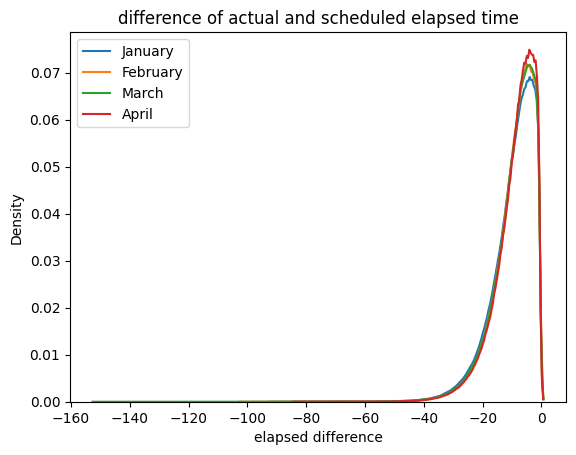

In [ ]:
# density plot for all 4 months dataset

# Create a figure and axes for the plot
fig, ax = plt.subplots()

# Filter for January
filtered_df1 = dat_threshold[dat_threshold['Month'] == 1]
# Filter for February
filtered_df2 = dat_threshold[dat_threshold['Month'] == 2]
# Filter for March
filtered_df3 = dat_threshold[dat_threshold['Month'] == 3]
# Filter for April
filtered_df4 = dat_threshold[dat_threshold['Month'] == 4]

# Plot the first density plot
sns.kdeplot(filtered_df1['Difference'], ax=ax, label='January')

# Plot the second density plot
sns.kdeplot(filtered_df2['Difference'], ax=ax, label='February')

# Plot the third density plot
sns.kdeplot(filtered_df3['Difference'], ax=ax, label='March')

# Plot the fourth density plot
sns.kdeplot(filtered_df4['Difference'], ax=ax, label='April')

# Add labels and title
plt.xlabel('elapsed difference')
plt.ylabel('Density')
plt.title('difference of actual and scheduled elapsed time')

# Display the legend
plt.legend()

# Show the plot
plt.show()


### Histogram : to see the distribution of each days for 4 months on earlier elapsed time leading to early arrival time during the day

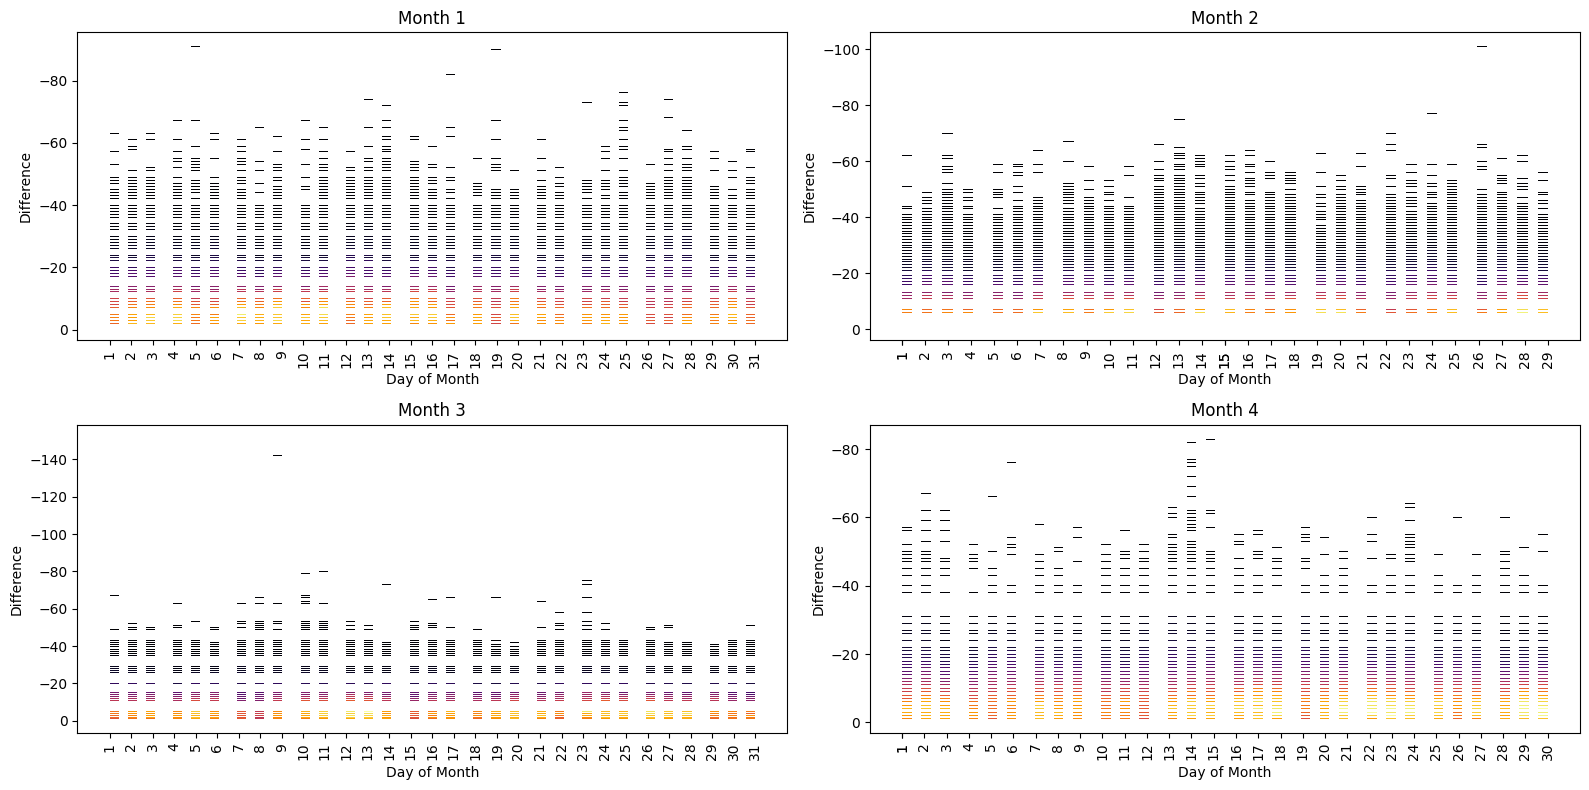

In [ ]:
# Create the figure and subplots
f, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 8))

# Filter and plot histogram for each subset
for i, ax in enumerate(axes.flatten()):
    month = i + 1
    filtered_df = dat_threshold[dat_threshold['Month'] == month]
    filtered_df_1 = filtered_df[filtered_df['DayofMonth'].isin(filtered_df['DayofMonth'].unique())]

    if not filtered_df_1.empty:
        sns.histplot(data=filtered_df_1, x='DayofMonth', y='Difference', ax=ax, cmap = 'inferno').invert_yaxis()
        ax.set_title(f'Month {month}')
        ax.set_xlabel('Day of Month')
        ax.set_ylabel('Difference')

        # Set x-axis ticks and labels for a subset of unique DayofMonth values
        xticks = np.linspace(filtered_df_1['DayofMonth'].min(), filtered_df_1['DayofMonth'].max(), num=31, dtype=int)
        ax.set_xticks(xticks)
        ax.set_xticklabels(xticks.astype(str), rotation=90)
    else:
        ax.set_title(f'Month {month} (No Data)')
        ax.set_axis_off()  # Turn off the axis if there is no data

# Adjust the spacing between subplots
plt.tight_layout()

# Show the combined plot
plt.show()

### Graph observation & interpretation

Elapsed time is considered for in determining the best time and worst time for people to travel. This is because it is the total time taken for a plane to travel from departure until arrival, and it is inclusive of the extra time taken by the aircraft over air time for some emergencies and unavoidable situations.

Prior to graph analysis, the differences between actual elapsed time and scheduled elapsed time (CRSElapsedTime) is calculated.

As for the best time to travel, a negative value in differences of elapsed time is considered as it indicates that the total flight time is shorter than expected, and vice versa for the worst time to travel.

A shorter total elapsed time justifies better for optimum travelling experience because it indicates that there are little noises and disturbances during the flight journey. This includes less emergency occurs, flight technical difficulties, and to name a few, the lesser the unavoidable emergencies and disturbance, the better the flight experiences.

Therefore, generally from the density plot, it is observed that the differences are similar for all four months which are between 0 and -40 minutes. Inference can be made that most of the flights demonstrated shorter elapsed time and arrived around 40 minutes earlier than expected time.

To observe a daily distribution throughout the month, a histogram including elapsed time of each day for all four months is plotted. Thus, the distribution shows that most of the four months arrived earlier by 40 to 60 minutes. Although there was an extreme shorter elapsed time in 8th of March 2008, but the occurrence is rare and it does not justify that March is the best month to travel.

Further observation in April and January reveals higher occurrence of earlier elapsed time between 60 to 80 minutes. However, the frequency of occurrence was slightly higher in April then in January. Since there is no significant distinction in frequency between January and April, it is presumed that the best time to travel is around either January, end of winter season, or April, mid of spring season.


##**QUESTION 2**:
###When is the worst time to travel?

---

In [ ]:
# all in minutes (for ActualElapsedTime, CRSElapsedTime, Difference)
threshold_1 =0 #defining the threshold first before setting a limiting value
#threshold_1 > 0
dat_threshold_1 = dat[dat['Difference'] > threshold_1]
dat_threshold_1

,DepTime,ArrTime,DayofMonth,Month,ActualElapsedTime,CRSElapsedTime,Origin,Dest,avg_DepDelay,avg_ArrDelay,Difference
126508,20:06:00,21:07:00,4.0,4.0,181.0,180.0,AUS,LAS,11.38916,10.273569,1.0
1140225,06:59:00,07:26:00,28.0,4.0,87.0,86.0,OMA,DEN,11.38916,10.273569,1.0
1902574,06:23:00,11:02:00,2.0,4.0,219.0,218.0,SAT,EWR,11.38916,10.273569,1.0
146711,10:40:00,12:09:00,16.0,2.0,89.0,88.0,RDU,ATL,11.38916,10.273569,1.0
639349,08:39:00,11:40:00,22.0,3.0,121.0,120.0,ORD,EWR,11.38916,10.273569,1.0
...,...,...,...,...,...,...,...,...,...,...,...
1854293,17:37:00,04:02:00,1.0,4.0,565.0,215.0,HOU,JFK,11.38916,10.273569,350.0
1670030,16:55:00,00:08:00,16.0,1.0,433.0,78.0,ATL,SDF,11.38916,10.273569,355.0
1671957,19:40:00,03:59:00,16.0,1.0,619.0,260.0,ATL,PHX,11.38916,10.273569,359.0
356501,09:06:00,21:03:00,6.0,3.0,837.0,370.0,LAS,HNL,11.38916,10.273569,467.0


### Density plot : to see the density distribution for 4 months


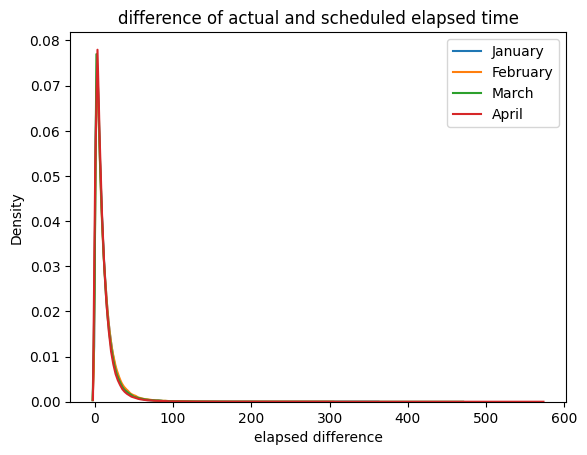

In [ ]:
# density plot for all 4 months dataset

# Create a figure and axes for the plot
fig, ax = plt.subplots()

# Filter for January
filtered_df1 = dat_threshold_1[dat_threshold_1['Month'] == 1]
# Filter for February
filtered_df2 = dat_threshold_1[dat_threshold_1['Month'] == 2]
# Filter for March
filtered_df3 = dat_threshold_1[dat_threshold_1['Month'] == 3]
# Filter for April
filtered_df4 = dat_threshold_1[dat_threshold_1['Month'] == 4]

# Plot the first density plot
sns.kdeplot(filtered_df1['Difference'], ax=ax, label='January')

# Plot the second density plot
sns.kdeplot(filtered_df2['Difference'], ax=ax, label='February')

# Plot the third density plot
sns.kdeplot(filtered_df3['Difference'], ax=ax, label='March')

# Plot the fourth density plot
sns.kdeplot(filtered_df4['Difference'], ax=ax, label='April')

# Add labels and title
plt.xlabel('elapsed difference')
plt.ylabel('Density')
plt.title('difference of actual and scheduled elapsed time')

# Display the legend
plt.legend()

# Show the plot
plt.show()


### Histogram : to see the distribution of each days for 4 months on earlier elapsed time leading to early arrival time during the day

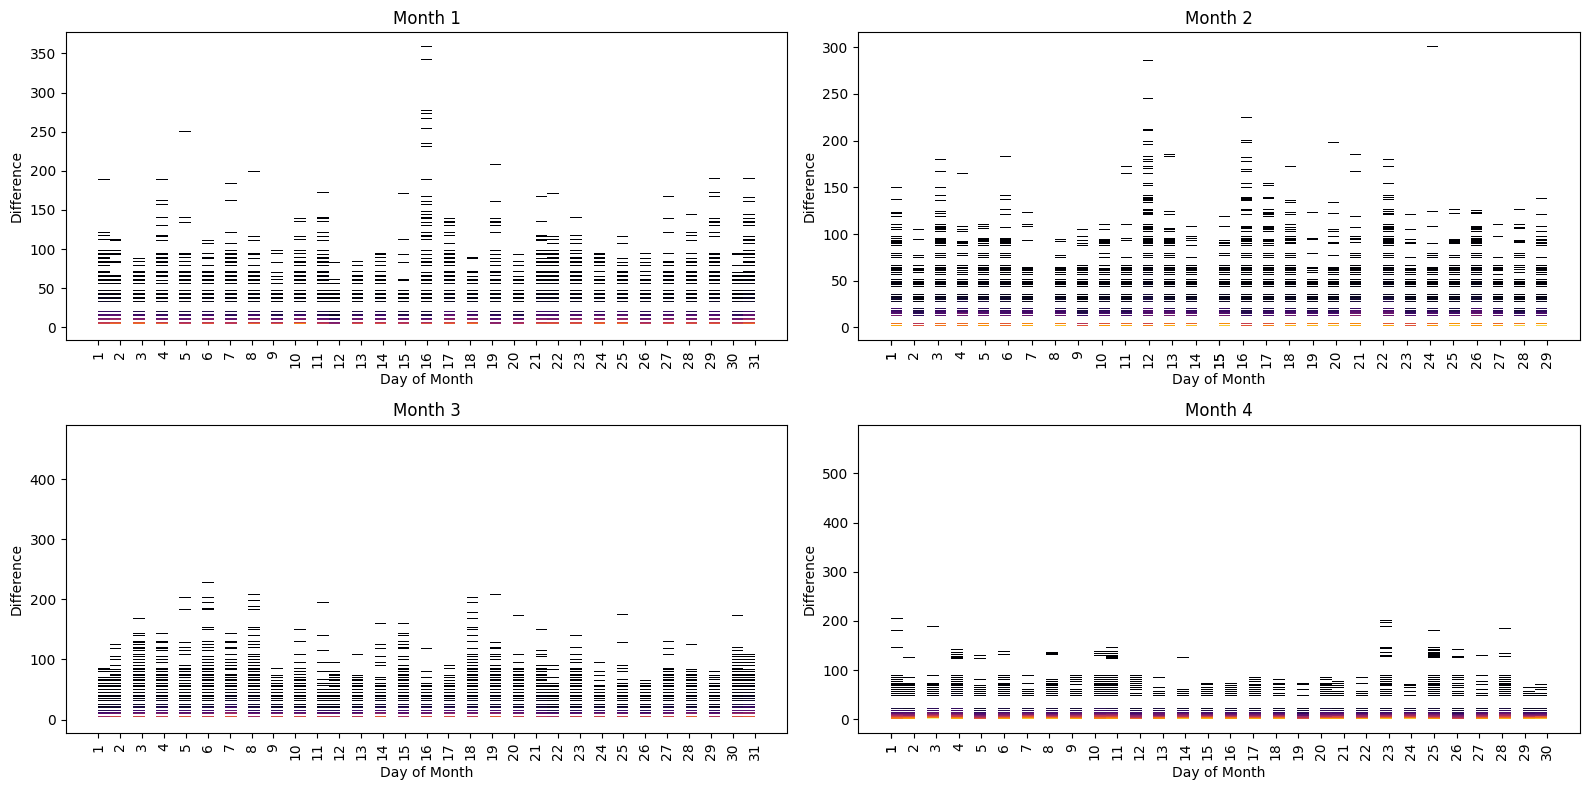

In [ ]:
# Create the figure and subplots
f, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 8))

# Filter and plot histogram for each subset
for i, ax in enumerate(axes.flatten()):
    month = i + 1
    filtered_df = dat_threshold_1[dat_threshold_1['Month'] == month]
    filtered_df_1 = filtered_df[filtered_df['DayofMonth'].isin(filtered_df['DayofMonth'].unique())]

    if not filtered_df_1.empty:
        sns.histplot(data=filtered_df_1, x='DayofMonth', y='Difference', ax=ax, cmap = 'inferno')
        ax.set_title(f'Month {month}')
        ax.set_xlabel('Day of Month')
        ax.set_ylabel('Difference')

        # Set x-axis ticks and labels for a subset of unique DayofMonth values
        xticks = np.linspace(filtered_df_1['DayofMonth'].min(), filtered_df_1['DayofMonth'].max(), num=31, dtype=int)
        ax.set_xticks(xticks)
        ax.set_xticklabels(xticks.astype(str), rotation=90)
    else:
        ax.set_title(f'Month {month} (No Data)')
        ax.set_axis_off()  # Turn off the axis if there is no data

# Adjust the spacing between subplots
plt.tight_layout()

# Show the combined plot
plt.show()

### Graph observation & interpretation

As for the worst time to travel, a positive value in differences of elapsed time indicates that the total flight time is longer than expected.

A longer total elapsed time justifies better for poor travelling experience because it indicates that there are more noises and disturbances during the flight journey. This includes more frequent emergency occurs, flight technical difficulties, and to name a few that leads to facing the worst flight experiences.

Therefore, generally from the density plot, it is noticed that the differences are similar for all four months which are between 0 and 100 minutes. Most of the flights with longer elapsed time arrived later by more than one hour as compared to expected time.

The histogram of daily distribution plotted shows that most of the flight experienced longer actual elapsed time of at least 100 minutes

Furthermore, the elapsed time from 100 to 200 minutes is observed more frequently in February and March. However, there were more frequent longer elapsed time of more than 200 minutes in March 2008. This might due to the starting of spring season where more travellers are interested to experience the floral bloom in Spring.

Therefore, March is induced as the worst time to travel as it has the highest frequency of longest elapsed flight time which affects the total flight journey.


##**QUESTION 3** :
###Do older planes suffer more delays?

---







In [ ]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#load the data - plane-data.csv

plane_data = pd.read_csv("/content/drive/MyDrive/SEMESTER 2/DATA MANAGEMENT/Assignment2/FINAL_ASSIGNMENT_2/plane-data.csv")
plane_data.head(3)
# AA airplane is american airline

,tailnum,type,manufacturer,issue_date,model,status,aircraft_type,engine_type,year
0,N050AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,N051AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,N052AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#load the data - 2008.csv.bz2

dat = pd.read_csv("/content/drive/MyDrive/SEMESTER 2/DATA MANAGEMENT/Assignment2/FINAL_ASSIGNMENT_2/2008.csv.bz2")
dat.head(3)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,1343.0,1325,1451.0,1435,WN,588,...,4.0,9.0,0,NaN,0,16.0,0.0,0.0,0.0,0.0
1,2008,1,3,4,1125.0,1120,1247.0,1245,WN,1343,...,3.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,2009.0,2015,2136.0,2140,WN,3841,...,2.0,14.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [ ]:
plane_data1= dat.dropna()
plane_data1 = plane_data.rename(columns={'tailnum': 'TailNum'})
plane_data1.head(3)

,TailNum,type,manufacturer,issue_date,model,status,aircraft_type,engine_type,year
0,N050AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,N051AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,N052AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dat_1 = pd.DataFrame(dat[['FlightNum', 'TailNum', 'DepDelay']])
dat_1.head()

,FlightNum,TailNum,DepDelay
0,588,N240WN,18.0
1,1343,N523SW,5.0
2,3841,N280WN,-6.0
3,3,N308SA,8.0
4,25,N462WN,23.0


In [ ]:
#remove the "N050AA" from the tailnum due to NA
dat_1 = dat_1[dat_1['TailNum'] != 'N050AA']

#to check if the "N050AA" data is already remove
dat_1[dat_1['TailNum'] == 'N050AA'].sum()

FlightNum    0.0
TailNum      0.0
DepDelay     0.0
dtype: float64

In [ ]:
#final dataset
#merging between dat_1 and plane_data1
concatenated_flight = pd.merge(dat_1, plane_data1, on='TailNum')
concatenated_flight.head()

,FlightNum,TailNum,DepDelay,type,manufacturer,issue_date,model,status,aircraft_type,engine_type,year
0,588,N240WN,18.0,Corporation,BOEING,07/11/2006,737-7H4,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2006
1,41,N240WN,-2.0,Corporation,BOEING,07/11/2006,737-7H4,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2006
2,41,N240WN,16.0,Corporation,BOEING,07/11/2006,737-7H4,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2006
3,41,N240WN,1.0,Corporation,BOEING,07/11/2006,737-7H4,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2006
4,588,N240WN,2.0,Corporation,BOEING,07/11/2006,737-7H4,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2006


In [ ]:
concatenated_flight['year'].unique()

array(['2006', '1992', '2007', '1986', '2004', '1991', '1998', '2005',
       '1996', '1997', '2003', '1990', '1988', '1985', '2002', '1993',
       '2001', '1999', '2000', '1995', '1994', '1989', nan, '1975',
       '1967', '1984', '1987', '1966', '2008', '0000', '1983', '1982',
       '1957', '1979', '1976', '1978', '1980', '1977', '1968', '1969',
       '1970', '1973', '1971', '1956', '1963', '1972', '1974', '1959',
       '1964', '1962', '1965'], dtype=object)

In [ ]:
#Determine the age of each plane by calculating the difference between
#the current year and the year the plane was manufactured.

current_year = 2008
concatenated_flight['Age'] = current_year - concatenated_flight['year']
concatenated_flight['Age'] = concatenated_flight['Age'].astype(float).astype('Int64')

concatenated_flight.head()

,FlightNum,TailNum,DepDelay,type,manufacturer,issue_date,model,status,aircraft_type,engine_type,year,Age
0,588,N240WN,18.0,Corporation,BOEING,07/11/2006,737-7H4,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2006,2
1,41,N240WN,-2.0,Corporation,BOEING,07/11/2006,737-7H4,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2006,2
2,41,N240WN,16.0,Corporation,BOEING,07/11/2006,737-7H4,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2006,2
3,41,N240WN,1.0,Corporation,BOEING,07/11/2006,737-7H4,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2006,2
4,588,N240WN,2.0,Corporation,BOEING,07/11/2006,737-7H4,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2006,2


In [ ]:
#year is manufacturing year , none meaning that info unknown but is not the null value
# the purpose for visualization

# Drop NA from year
concatenated_flight = concatenated_flight.dropna(subset=['year'])

# Replace 'None' with NaN
concatenated_flight = concatenated_flight.replace('None', np.nan)

concatenated_flight['year'] = concatenated_flight['year'].astype(float).astype('Int64')


concatenated_flight = concatenated_flight[concatenated_flight['year'] != 0]

print(concatenated_flight.dtypes)


FlightNum          int64
TailNum           object
DepDelay         float64
type              object
manufacturer      object
issue_date        object
model             object
status            object
aircraft_type     object
engine_type       object
year               Int64
Age                Int64
dtype: object


In [ ]:
#Group the DataFrame by the plane age and calculate the average delay
#for each age group:

average_delay_by_age = concatenated_flight.groupby('Age')['DepDelay'].mean()
average_delay_by_age.head()

Age
0    11.602811
1    10.311221
2    10.905069
3    10.802224
4    11.612220
Name: DepDelay, dtype: float64

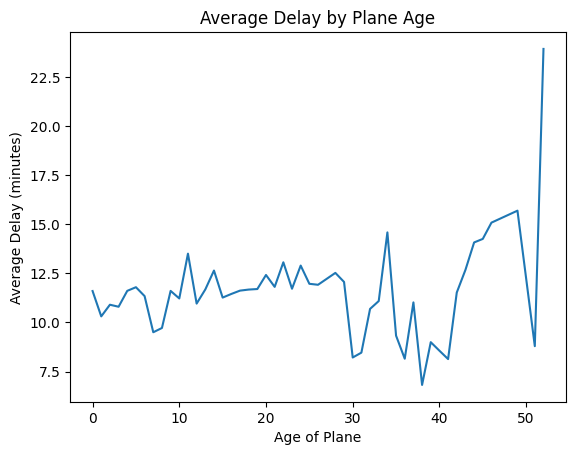

The min and max age of the plane: 0 , 52


In [ ]:
#Visualize the average delay times for each age group using a plot:

plt.plot(average_delay_by_age.index, average_delay_by_age.values)
plt.xlabel('Age of Plane')
plt.ylabel('Average Delay (minutes)')
plt.title('Average Delay by Plane Age')
plt.show()

print("The min and max age of the plane:" , concatenated_flight['Age'].min() ,
      "," , concatenated_flight['Age'].max())

In [ ]:
#compute the correlation value to support the figure above
#change the data types for Age
concatenated_flight['Age'] = concatenated_flight['Age'].astype(float).astype('int64')

correlation = concatenated_flight['Age'].corr(concatenated_flight['DepDelay'])
print("Correlation coefficient:", correlation)


Correlation coefficient: 0.006328234616918492


Based on the figure above, the graph shows **no clear pattern** between the average delay times for different age groups of planes. This indicates that the plane age should not be considered solely to justify the delay tendency in a flight experience.

This is being supported by the correlation coefficient of 0.00632 which is close to 0 and this suggests that the relationship between the average delay times for different age groups of planes showed a **weak or no correlation**.


##**QUESTION 4** :
###How does the number of people flying between different locations change over time?

---






Using Pig Latin:
```
-- Load the dataset
flight_data = LOAD '/user/maria_dev/A2/flight.csv.bz2' USING PigStorage(',') AS (
    FlightYear: int,
    Month: int,
    DayofMonth: int,
    DayOfWeek: int,
    DepTime: int,
    CRSDepTime: int,
    ArrTime: int,
    CRSArrTime: int,
    UniqueCarrier: chararray,
    FlightNum: int,
    FlightTailNum: chararray,
    ActualElapsedTime: int,
    CRSElapsedTime: int,
    AirTime: int,
    ArrDelay: int,
    DepDelay: int,
    Origin: chararray,
    Dest: chararray,
    Distance: int,
    TaxiIn: int,
    TaxiOut: int,
    Cancelled: int,
    CancellationCode: chararray,
    Diverted: int,
    CarrierDelay: int,
    WeatherDelay: int,
    NASDelay: int,
    SecurityDelay: int,
    LateAircraftDelay: int);

-- Create unique group of origin-dest pairs in different month
-- Calculate the number of sets for each unique group
flight_counts = GROUP flight_data BY (Month, Origin, Dest);
flight_counts = FOREACH flight_counts GENERATE
    group.Month AS (Month: int), group.Origin AS (Origin: chararray), group.Dest AS (Dest: chararray),
    COUNT(flight_data) AS (FlightCount: int);

DESCRIBE flight_counts;
DUMP flight_counts

-- Store the output
STORE flight_counts INTO '/user/maria_dev/A2/flight_counts.csv' USING PigStorage(',');
```



Refer to the complete flight dataset, the number of flights for the months from each origin to different destination is computed and saved in 'flight_counts.csv' file.

A new column is added into the dataset to indicate the route of the flight together. The top 10 most popular flights in January are selected to check on the trend across the four months.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# load the data - flight_counts.csv
data = pd.read_csv("/content/drive/MyDrive/SEMESTER 2/DATA MANAGEMENT/Assignment2/FINAL_ASSIGNMENT_2/flight_counts.csv", header = None)
data

,0,1,2,3
0,1.0,ABE,ATL,73
1,1.0,ABE,CLE,75
2,1.0,ABE,CLT,30
3,1.0,ABE,CVG,26
4,1.0,ABE,DTW,79
...,...,...,...,...
18301,4.0,YUM,LAS,12
18302,4.0,YUM,LAX,90
18303,4.0,YUM,PHX,157
18304,4.0,YUM,SLC,53


In [ ]:
# choose the last row as header
flight = data.rename(columns = data.iloc[18305]).drop(data.index[18305])

# change the column names from NaN & 0
flight.columns = flight.columns.fillna("Month")
flight = flight.rename(columns = {0: "Count"})

flight

,Month,Origin,Dest,Count
0,1.0,ABE,ATL,73
1,1.0,ABE,CLE,75
2,1.0,ABE,CLT,30
3,1.0,ABE,CVG,26
4,1.0,ABE,DTW,79
...,...,...,...,...
18300,4.0,YUM,IPL,52
18301,4.0,YUM,LAS,12
18302,4.0,YUM,LAX,90
18303,4.0,YUM,PHX,157


In [ ]:
# combine values from Origin and Dest to create route of flight
flight_data = flight
flight_data['Origin_Dest'] = flight_data['Origin'] + ' - ' + flight_data['Dest']
flight_data

,Month,Origin,Dest,Count,Origin_Dest
0,1.0,ABE,ATL,73,ABE - ATL
1,1.0,ABE,CLE,75,ABE - CLE
2,1.0,ABE,CLT,30,ABE - CLT
3,1.0,ABE,CVG,26,ABE - CVG
4,1.0,ABE,DTW,79,ABE - DTW
...,...,...,...,...,...
18300,4.0,YUM,IPL,52,YUM - IPL
18301,4.0,YUM,LAS,12,YUM - LAS
18302,4.0,YUM,LAX,90,YUM - LAX
18303,4.0,YUM,PHX,157,YUM - PHX


In [ ]:
# To find out the 10 most popular route
# The top 10 Origin_Dest will be identified from the first month of flight count

# filter the data for month 1
month_1_data = flight_data[flight_data['Month'] == 1]

# sort the number of flights in descending order
sorted_data = month_1_data.sort_values('Count', ascending = False)

# get the top 10 of flights in the first month
top_10_data = sorted_data.head(10)

# identify the routes from top_10_data
top_data = top_10_data['Origin_Dest'].unique()

# select rows from 'flight_data' based on the top 10 routes identified
filtered_data = flight_data[flight_data['Origin_Dest'].isin(top_data)]
print(filtered_data)

       Month Origin Dest  Count Origin_Dest
1796     1.0    HNL  LIH   1111   HNL - LIH
1799     1.0    HNL  OGG   1294   HNL - OGG
2275     1.0    LAS  LAX   1066   LAS - LAX
2301     1.0    LAS  PHX   1007   LAS - PHX
2364     1.0    LAX  LAS   1128   LAX - LAS
2394     1.0    LAX  SFO   1036   LAX - SFO
2495     1.0    LIH  HNL   1079   LIH - HNL
3135     1.0    OGG  HNL   1327   OGG - HNL
3554     1.0    PHX  LAX    959   PHX - LAX
4070     1.0    SFO  LAX   1056   SFO - LAX
6396     2.0    HNL  LIH   1055   HNL - LIH
6399     2.0    HNL  OGG   1235   HNL - OGG
6869     2.0    LAS  LAX    944   LAS - LAX
6895     2.0    LAS  PHX    931   LAS - PHX
6957     2.0    LAX  LAS    976   LAX - LAS
6985     2.0    LAX  SFO    999   LAX - SFO
7083     2.0    LIH  HNL   1027   LIH - HNL
7720     2.0    OGG  HNL   1264   OGG - HNL
8134     2.0    PHX  LAX    858   PHX - LAX
8637     2.0    SFO  LAX   1032   SFO - LAX
10961    3.0    HNL  LIH    696   HNL - LIH
10963    3.0    HNL  OGG    780 

In [ ]:
# top 10 popular routes in month 1
print(top_data)

['OGG - HNL' 'HNL - OGG' 'LAX - LAS' 'HNL - LIH' 'LIH - HNL' 'LAS - LAX'
 'SFO - LAX' 'LAX - SFO' 'LAS - PHX' 'PHX - LAX']


In [ ]:
# to find out the origins from top 10 routes
print(filtered_data['Origin'].unique())
print("Number of popular origins : ", filtered_data['Origin'].nunique())

['HNL' 'LAS' 'LAX' 'LIH' 'OGG' 'PHX' 'SFO']
Number of popular origins :  7


In [ ]:
# to find out the destinations from top 10 routes
print(filtered_data['Dest'].unique())
print("Number of popular destinations : ", filtered_data['Dest'].nunique())

['LIH' 'OGG' 'LAX' 'PHX' 'LAS' 'SFO' 'HNL']
Number of popular destinations :  7


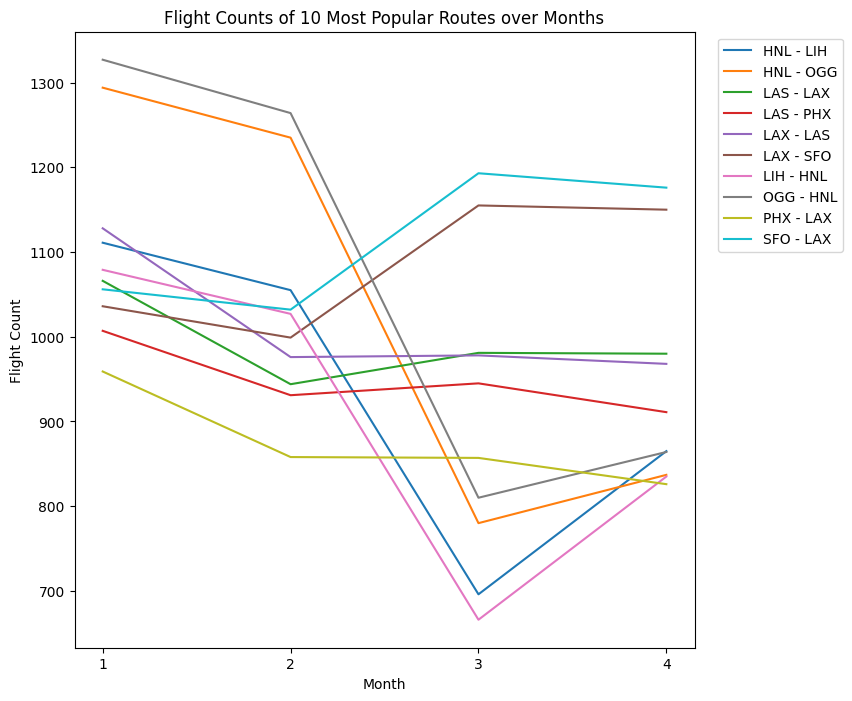

In [ ]:
# set the figure size
plt.figure(figsize = (8, 8))

# grouped line plot
for route, data in filtered_data.groupby('Origin_Dest'):
    plt.plot(data['Month'], data['Count'], label = route)

# add labels and title
plt.xlabel("Month")
plt.xticks(filtered_data['Month'].unique())
plt.ylabel("Flight Count")
plt.title("Flight Counts of 10 Most Popular Routes over Months")

# add legend
plt.legend(bbox_to_anchor = (1.25, 1), loc = 'upper right')

# display the plot
plt.show()

These are the 10 most popular routes to track the changes over time: 'OGG - HNL', 'HNL - OGG', 'LAX - LAS', 'HNL - LIH', 'LIH - HNL', 'LAS - LAX',
 'SFO - LAX', 'LAX - SFO', 'LAS - PHX' and 'PHX - LAX'.

Among the popular routes from January, there are 7 origins and 7 destinations included. There are people travelling from the same origin but different destinations or people going to the same destination from diferent origins.
The origins with two destinations are 'HNL', 'LAS' and 'LAX'. People travel to 'HNL' from 'LIH' and 'OGG' while to 'LAX' from 'LAS', 'PHX' and 'SFO'. Besides, most of the flights seem to be a return flight as the popular origins and destinations are the same places. There are only two routes without return which are 'LAS - PHX' and 'PHX - LAX'.

From the graph, it is obvious that the numbers of flight for 'OGG - HNL', 'HNL - OGG', 'HNL - LIH' and 'LIH - HNL' decreased in February and drop drastically in March falling behind other routes. In the last month, the numbers started to increase but still behind most routes.

Other routes basically showed a drop in flight numbers in February as well. Big increase in number of flights was only found for routes 'SFO - LAX' and 'LAX - SFO' while slight increase for the rest in the next month. When it came to April, their flights were either maintained or dropped some numbers.

##**QUESTION 5** :
###How well does weather predict plane delays?

---






In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

There are five factors of delay observed in the dataset of complete flight named as 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay' and 'LateAircraftDelay'. The flight delay may refer to delay in departure time ('DepDelay') or delay in arrival time ('ArrTime'). The cancelled flights share the similar reasons of cancellation but without late-arriving aircraft category.

Definition of category:


*   Carrier: Cause of delay (or cancellation) due to circumstances under control of airline such as maintenance or crew problems, aircraft cleaning, baggage loading and fuelling.
*   Weather: Actual or forecasted extreme weathers like tornado, blizzard or hurricane when delay or cancel of flight operation has to be considered.
*   National Aviation System (NAS): Delays and cancellations based on national aviation system with general conditions of non-extreme weather conditions, airport operations, heavy traffic volume and air traffic control.
*   Security: Delays or cancellations caused by evacuation of a terminal or concourse, re-boarding of aircraft due to security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas.
*   Late-arriving aircraft: Late arrival of previous flight with same aircraft lead to late departure of present flight

(Understanding the Reporting of Causes of Flight Delays and Cancellations, 2022)



In [ ]:
# load the data - flight.csv.bz2
delay = pd.read_csv("/content/drive/MyDrive/SEMESTER 2/DATA MANAGEMENT/Assignment2/FINAL_ASSIGNMENT_2/flight.csv.bz2")

In [ ]:
# check all column names
delay.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [ ]:
# select columns related to delay
delay_factor = delay[['ArrDelay','DepDelay','CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay']]
delay_factor.head()

,ArrDelay,DepDelay,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,16.0,18.0,16.0,0.0,0.0,0.0,0.0
1,2.0,5.0,NaN,NaN,NaN,NaN,NaN
2,-4.0,-6.0,NaN,NaN,NaN,NaN,NaN
3,-2.0,8.0,NaN,NaN,NaN,NaN,NaN
4,16.0,23.0,16.0,0.0,0.0,0.0,0.0


In [ ]:
# identify the rows with NA
delay_factor[delay_factor['WeatherDelay'].isnull()]

,ArrDelay,DepDelay,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1,2.0,5.0,NaN,NaN,NaN,NaN,NaN
2,-4.0,-6.0,NaN,NaN,NaN,NaN,NaN
3,-2.0,8.0,NaN,NaN,NaN,NaN,NaN
5,0.0,4.0,NaN,NaN,NaN,NaN,NaN
6,3.0,8.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2319116,-3.0,0.0,NaN,NaN,NaN,NaN,NaN
2319117,3.0,-1.0,NaN,NaN,NaN,NaN,NaN
2319118,3.0,0.0,NaN,NaN,NaN,NaN,NaN
2319119,-1.0,-2.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
# it seems like there are delays or early departure with no data recorded
# the data may not recorded for all together by the time
# check NA for each column if they are same as above to confirm
delay_factor.isnull().sum()

ArrDelay                   0
DepDelay                   0
CarrierDelay         1734538
WeatherDelay         1734538
NASDelay             1734538
SecurityDelay        1734538
LateAircraftDelay    1734538
dtype: int64

In [ ]:
# remove the NA values
# not to include in relationship analysis
delay_clean = delay_factor.dropna()
delay_clean

,ArrDelay,DepDelay,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,16.0,18.0,16.0,0.0,0.0,0.0,0.0
4,16.0,23.0,16.0,0.0,0.0,0.0,0.0
9,26.0,28.0,11.0,0.0,0.0,0.0,15.0
11,56.0,53.0,53.0,0.0,3.0,0.0,0.0
12,39.0,19.0,10.0,0.0,20.0,0.0,9.0
...,...,...,...,...,...,...,...
2319087,81.0,88.0,0.0,0.0,0.0,0.0,81.0
2319088,63.0,76.0,0.0,0.0,0.0,0.0,63.0
2319095,25.0,31.0,25.0,0.0,0.0,0.0,0.0
2319097,23.0,-3.0,0.0,0.0,23.0,0.0,0.0


By checking few rows in the dataset, it is noticed that total of the delays in minutes equals to the values of 'ArrDelay' but not the same as 'DepDelay'. A regression analysis is done to model the linear relationship of responding variable ('DepDelay' or 'ArrDelay') and the delay factors.

In [ ]:
# linear relationship between DepDelay and delay factors
dep_results = smf.ols('DepDelay ~ CarrierDelay + WeatherDelay + NASDelay + SecurityDelay + LateAircraftDelay', data = delay_clean).fit()
print(dep_results.summary())

                            OLS Regression Results                            
Dep. Variable:               DepDelay   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                 1.221e+06
Date:                Mon, 12 Jun 2023   Prob (F-statistic):               0.00
Time:                        05:17:10   Log-Likelihood:            -2.4911e+06
No. Observations:              584583   AIC:                         4.982e+06
Df Residuals:                  584577   BIC:                         4.982e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -4.7895      0.03

In [ ]:
# linear relationship between ArrDelay and delay factors
arr_results = smf.ols('ArrDelay ~ CarrierDelay + WeatherDelay + NASDelay + SecurityDelay + LateAircraftDelay', data = delay_clean).fit()
print(arr_results.summary())

                            OLS Regression Results                            
Dep. Variable:               ArrDelay   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.696e+34
Date:                Mon, 12 Jun 2023   Prob (F-statistic):               0.00
Time:                        05:17:15   Log-Likelihood:             1.6798e+07
No. Observations:              584583   AIC:                        -3.360e+07
Df Residuals:                  584577   BIC:                        -3.360e+07
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          2.157e-14   1.51e-1

Based on the regression analysis, the delay factors explain arrival delay better than departure delay. Arrival model has a higher and perfect R² value (1.00) as well as lower values of AIC and BIC (both are -3.360e+07) compared to departure model (R² = 0.913, AIC & BIC = 4.982e+06).

With intercept is extremely small and close to zero, the relationship of 'ArrDelay' and delay factors match to previous assumption and can be concluded as below:

ArrDelay = CarrierDelay + WeatherDelay + NASDelay + SecurityDelay + LateAircraftDelay

Among the factors, 'WeatherDelay' and 'NASDelay' are related to the delays due to weather condition. The effect of these two causes on 'ArrDelay' will be checked in another model of regression.

In [ ]:
arr_weather = smf.ols('ArrDelay ~ WeatherDelay + NASDelay', data = delay_clean).fit()
print(arr_weather.summary())

                            OLS Regression Results                            
Dep. Variable:               ArrDelay   R-squared:                       0.192
Model:                            OLS   Adj. R-squared:                  0.192
Method:                 Least Squares   F-statistic:                 6.930e+04
Date:                Mon, 12 Jun 2023   Prob (F-statistic):               0.00
Time:                        05:17:19   Log-Likelihood:            -3.1208e+06
No. Observations:              584583   AIC:                         6.242e+06
Df Residuals:                  584580   BIC:                         6.242e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       43.3507      0.075    575.837   

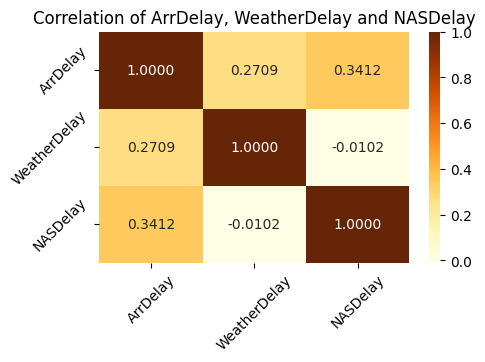

In [ ]:
# show the correlation between ArrDelay and WeatherDelay, NASDelay
corr = delay_clean[['ArrDelay', 'WeatherDelay', 'NASDelay']].corr()
# set the size of the heatmap
plt.figure(figsize = (5,3))

# customize the heatmap color palette
cp = sns.color_palette('YlOrBr', as_cmap = True)

# plot the heatmap, fmt='.4f' to show 4 decimal places
sns.heatmap(corr, cmap = cp, annot = True, fmt='.4f')

# display the plot
plt.title("Correlation of ArrDelay, WeatherDelay and NASDelay")
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)

plt.show()

R² = 0.192 explains a weak linear relationship between 'ArrDelay', 'WeatherDelay' and 'NASDelay'. When there is no weather condition to cause a delay, the arrival delay of 43.35 minutes may still happen due to other factors.

The equation of the fitted model: ArrDelay = 0.8021\*WeatherDelay + 0.6312\*NASDelay + 43.3507

Besides, the pairwise correlation coefficients of 'ArrDelay'-'WeatherDelay' (0.2709) and 'ArrDelay'-'NASDelay' (0.3412) also indicate the positive but weak correlation between the variables.

It is believed that the weather should be the main concerns of the flight operations. The outcome of weak prediction on the flight delays by weather may not so persuasive but it is quite possible as well. If weather is not that bad, a delay may not be necessary unless other factors are triggered in which the reason of delays may fall to other category at the end. If the weather is bad or even worst as extreme weather, a flight is most probably being called off instead of a delay with safety as main consideration.

In [ ]:
# load the data - cancelled.csv
cancel = pd.read_csv("/content/drive/MyDrive/SEMESTER 2/DATA MANAGEMENT/Assignment2/FINAL_ASSIGNMENT_2/cancelled.csv")
cancel.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,NaN,08:00:00,NaN,08:50:00,WN,609,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,NaN,07:00:00,NaN,08:30:00,WN,126,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,NaN,11:00:00,NaN,12:15:00,WN,1146,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,NaN,09:05:00,NaN,10:25:00,WN,469,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,NaN,16:20:00,NaN,17:40:00,WN,618,...,NaN,NaN,1,C,0,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Calculate the count of each CancellationCode
code = cancel['CancellationCode'].value_counts().reset_index()

# Rename the columns & change the code to reason
code.columns = ["Reason", "Count"]
code['Reason'] = code['Reason'].map({"A": "carrier", "B": "weather",
                                         "C": "NAS", "D": "security"})
code

,Reason,Count
0,carrier,26075
1,weather,25744
2,NAS,12617
3,security,6


In [ ]:
# calculate the percentage of cancels by weather issues
pct = round(((25744 + 12617)/code['Count'].sum()) * 100, 2)
print("Percentage of flights cancelled due to weather:",pct,"%")

Percentage of flights cancelled due to weather: 59.53 %


From the data of cancelled flight, the percentage of flights cancelled due to weather is around 59.53% which can be assumed that weather affects more to cancel of flight than delay of flight.

In conclusion, weather factors are not so well to be used as a single variable to predict plane delays. However, further study of the weak prediction of plane delays by weather can be done with more data available. The current result involves only 4 months data which may be a limitation to the prediction.

##**QUESTION 6** :
###What is the major factor that caused the delays? Using Hive

---


### Part 1 : To get Total Minutes of Delay by Different Delay Causes

    select sum(carrierdelay) SumCarrierDelay, sum(weatherdelay SumWeatherDelay, sum(nasdelay) SumNasDelay, Sum(securitydelay) as SumSecurityDelay, sum(lateaircraftdelay) as SumLateAirCraftDelay
    from selected_columns2;



### Part 2 : To get number of times of delay
#### Step 1 : Create the tagging, if Delay = Yes, if no delay=NO

    create table selected_columns3 as
    select
    case when carrierdelay=0 THEN 'NO' ELSE 'YES' END AS CarrierDelayTag,
    case when weatherdelay=0 THEN 'NO' ELSE 'YES' END AS WeatherDelayTag,
    case when lateaircraftdelay=0 THEN 'NO' ELSE 'YES' END AS LateAirCraftDelayTag,
    case when nasdelay=0 THEN 'NO' ELSE 'YES' END AS nasdelayTag,
    case when securitydelay=0 THEN 'NO' ELSE 'YES' END AS SecurityDelayTag
    from selected_columns2;

##### Output table as selected_column3
#### Step 2 : Count the no of delay
    select count(CarrierDelayTag) as CarrierDelayTag
    from selected_columns3
    where CarrierDelayTag='YES';

    select count(nasdelaytag) as CountNasDelay
    from selected_columns3
    where nasdelaytag='YES';

    select count(securitydelaytag) as CountSecurityDelay
    from selected_columns3
    where securitydelaytag='YES';

    select count(lateaircraftdelaytag) as lateaircraftdelaytag
    from selected_columns3
    where lateaircraftdelaytag='YES';

    select count(weatherdelaytag) as weatherdelaytag
    from selected_columns3
    where weatherdelaytag='YES';








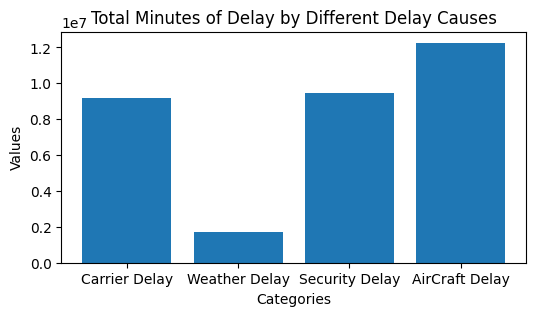

In [ ]:
import matplotlib.pyplot as plt

# Output from Q6 (part 1)
categories = ['Carrier Delay', 'Weather Delay', 'Security Delay', 'AirCraft Delay']
values = [9208911, 1717647, 9445962, 12262628]

# Create the bar chart
plt.figure(figsize=(6, 3))
plt.bar(categories, values)

# Add labels and title
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Total Minutes of Delay by Different Delay Causes')
plt.show()


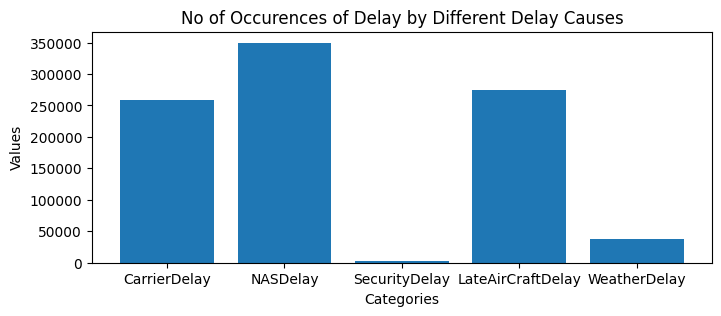

In [ ]:
import matplotlib.pyplot as plt

# Output from Q6 (part 2)
categories = ['CarrierDelay', 'NASDelay', 'SecurityDelay', 'LateAirCraftDelay', 'WeatherDelay']
values = [258695, 349648, 2748, 275249, 37650]

# Create the bar chart
plt.figure(figsize=(8, 3))
plt.bar(categories, values)

# Add labels and title
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('No of Occurences of Delay by Different Delay Causes')
plt.show()

From the perspective of duration of delay, the major delay factor is AirCraft Delay followed by Security Delay and Carrier Delay.

In terms of number of occurences of delay, the major delay factor is NAS delay followed by Late Air Craft delay and Carrier Delay.

Weather delay has the least delay issue for both number of delay occurences and duration of delay.

##**QUESTION 7**:  
###What is the major factor that caused flight cancellations?

---







```
-- Load the flight data
cancelled_data = LOAD '/user/maria_dev/Assignment2/cancelled.csv' USING PigStorage(',') AS (
    Year: int,
    Month: int,
    DayofMonth: int,
    DayOfWeek: int,
    DepTime: int,
    CRSDepTime: int,
    ArrTime: int,
    CRSArrTime: int,
    UniqueCarrier: chararray,
    FlightNum: int,
    TailNum: chararray,
    ActualElapsedTime: int,
    CRSElapsedTime: int,
    AirTime: int,
    ArrDelay: int,
    DepDelay: int,
    Origin: chararray,
    Dest: chararray,
    Distance: int,
    TaxiIn: int,
    TaxiOut: int,
    Cancelled: int,
    CancellationCode: chararray,
    Diverted: int,
    CarrierDelay: int,
    WeatherDelay: int,
    NASDelay: int,
    SecurityDelay: int,
    LateAircraftDelay: int
);

-- Define mapping of cancellation codes to numbers
code_mapping = FOREACH cancelled_data GENERATE CancellationCode, CASE CancellationCode
    WHEN 'A' THEN 1
    WHEN 'B' THEN 2
    WHEN 'C' THEN 3
    WHEN 'D' THEN 4
    ELSE 0
    END AS CancellationNumber;

-- Group cancelled flights by cancellation code and count occurrences
cancelled_grouped = GROUP cancelled_data BY CancellationCode;
cancellation_counts = FOREACH cancelled_grouped GENERATE group AS cancellation_code, COUNT(cancelled_data) AS count;

-- Display the major cancellation code
DESCRIBE cancelled_data;
DUMP cancellation_counts;
```



  Cancellation_Code  Count
0         A:carrier  26075
1         B:weather  25744
2             C:NAS  12617
3        D:security      6


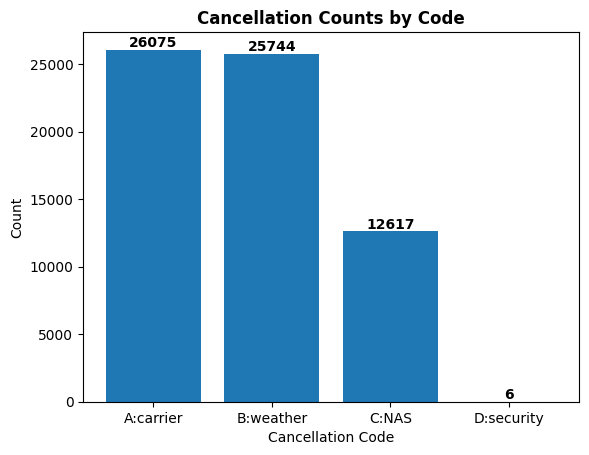

In [ ]:
#LOAD the data --  Q7_Output.csv

import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a pandas DataFrame
data = pd.read_csv('/content/drive/MyDrive/SEMESTER 2/DATA MANAGEMENT/Assignment2/Question2/Q7_Output.csv', header=None)


# Create a dictionary with the data
new_data = {
    'Cancellation_Code': ['A:carrier', 'B:weather', 'C:NAS', 'D:security'],
    'Count': [26075, 25744, 12617, 6]
}

# Create the DataFrame
df_7 = pd.DataFrame(new_data)

# Print the DataFrame
print(df_7)

# Plotting the 'Count' column
plt.bar(df_7['Cancellation_Code'], df_7['Count'])
plt.xlabel('Cancellation Code')
plt.ylabel('Count')
plt.title('Cancellation Counts by Code',fontweight='bold')

# Add count labels on top of each bar
#enumerate() is a built-in function that allows you to iterate over a sequence
#such as a list while also keeping track of the index of each element.
for i, v in enumerate(df_7['Count']):
    plt.text(i, v, str(v), ha='center', va='bottom', fontweight='bold')

plt.show()


The figure shows the 4 basic factors that lead to flight cancellation. Based on the bar chart, **factor A** which is carrier delay is the highest count in the data by **26075** times.

##**QUESTION 8**:  
###Which flight is the most delayed and frequently cancelled?

---



###8.a) Most delayed flight



```
-- Load the dataset
flight_data = LOAD '/user/maria_dev/A2/flight.csv.bz2' USING PigStorage(',') AS (
    FlightYear: int,
    Month: int,
    DayofMonth: int,
    DayOfWeek: int,
    DepTime: int,
    CRSDepTime: int,
    ArrTime: int,
    CRSArrTime: int,
    UniqueCarrier: chararray,
    FlightNum: int,
    FlightTailNum: chararray,
    ActualElapsedTime: int,
    CRSElapsedTime: int,
    AirTime: int,
    ArrDelay: int,
    DepDelay: int,
    Origin: chararray,
    Dest: chararray,
    Distance: int,
    TaxiIn: int,
    TaxiOut: int,
    Cancelled: int,
    CancellationCode: chararray,
    Diverted: int,
    CarrierDelay: int,
    WeatherDelay: int,
    NASDelay: int,
    SecurityDelay: int,
    LateAircraftDelay: int);
--DUMP flight_data;

-- Select columns to check routes with delayed time of departure
selected = FOREACH flight_data GENERATE DepDelay, Origin, Dest;

-- Filter out the punctual or early flights
filtered_data = FILTER selected BY DepDelay > 0;

-- Group into unique pairs of Origin-Dest
route = GROUP filtered_data BY (Origin, Dest);

-- Count the number of delays, total delay times and average time of delay for each route
route_delay = FOREACH route GENERATE
    group.Origin AS (Origin: chararray), group.Dest AS (Dest: chararray),
    SUM(filtered_data.DepDelay) AS (TotalDelayTime: int),
    COUNT(filtered_data) AS (DelayCount: int),
    AVG(filtered_data.DepDelay) AS (AvgDelayTime: float);

DESCRIBE route_delay;
DUMP route_delay;

-- Store data into a single file
STORE flight_counts INTO '/user/maria_dev/A2/route_delay.csv' USING PigStorage(',');
```

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

The most delayed flight is interpreted from two aspects, the count of delays and the average time of delay in minutes, based on the delay of departure. The flights in highest 1% count of delay and the flights with at least 120 minutes average time of delay are filtered and listed to compare for the highest one in each aspect.

In [ ]:
# load the data - route_delay.csv
data = pd.read_csv("/content/drive/MyDrive/SEMESTER 2/DATA MANAGEMENT/Assignment2/FINAL_ASSIGNMENT_2/route_delay.csv", header = None)
data

,0,1,2,3,4
0,ABE,ATL,4761,105,45.342857
1,ABE,BHM,11,1,11.000000
2,ABE,CLE,686,42,16.333333
3,ABE,CLT,166,6,27.666667
4,ABE,CVG,130,4,32.500000
...,...,...,...,...,...
4790,YUM,IPL,1303,70,18.614286
4791,YUM,LAS,743,17,43.705882
4792,YUM,LAX,1644,85,19.341176
4793,YUM,PHX,4599,126,36.500000


In [ ]:
# rename the columns
data = data.rename(columns = {0: "Origin", 1: "Dest", 2: "TotalDelayTime",
                              3: "DelayCount", 4: "AvgDelayTime"})

# round the values of 'AvgDelayTime' to 2 decimal places
data['AvgDelayTime'] = round(data['AvgDelayTime'], 2)

# combine values from Origin and Dest to create route of flight
data['Origin_Dest'] = data['Origin'] + ' - ' + data['Dest']
data.head()

,Origin,Dest,TotalDelayTime,DelayCount,AvgDelayTime,Origin_Dest
0,ABE,ATL,4761,105,45.34,ABE - ATL
1,ABE,BHM,11,1,11.00,ABE - BHM
2,ABE,CLE,686,42,16.33,ABE - CLE
3,ABE,CLT,166,6,27.67,ABE - CLT
4,ABE,CVG,130,4,32.50,ABE - CVG


In [ ]:
# To find out the flight with highest count of delay
# Compare within top 1% of 'DelayCount'

# select the relevant columns
dcount = data[['Origin_Dest','DelayCount']]

# get the number of rows for the top 1%
top_1 = int(len(dcount) * 0.01)

# sort the delay counts of flights in descending order
sorted_dcount = dcount.sort_values('DelayCount', ascending = False)

# get the flights of the top 1% in highest counts of delay
top_1_data = sorted_dcount.head(top_1)
top_1_data.head()

,Origin_Dest,DelayCount
2506,LAX - SFO,2224
1071,DAL - HOU,2042
1910,HOU - DAL,2004
3463,ORD - LGA,1964
4251,SFO - LAX,1895


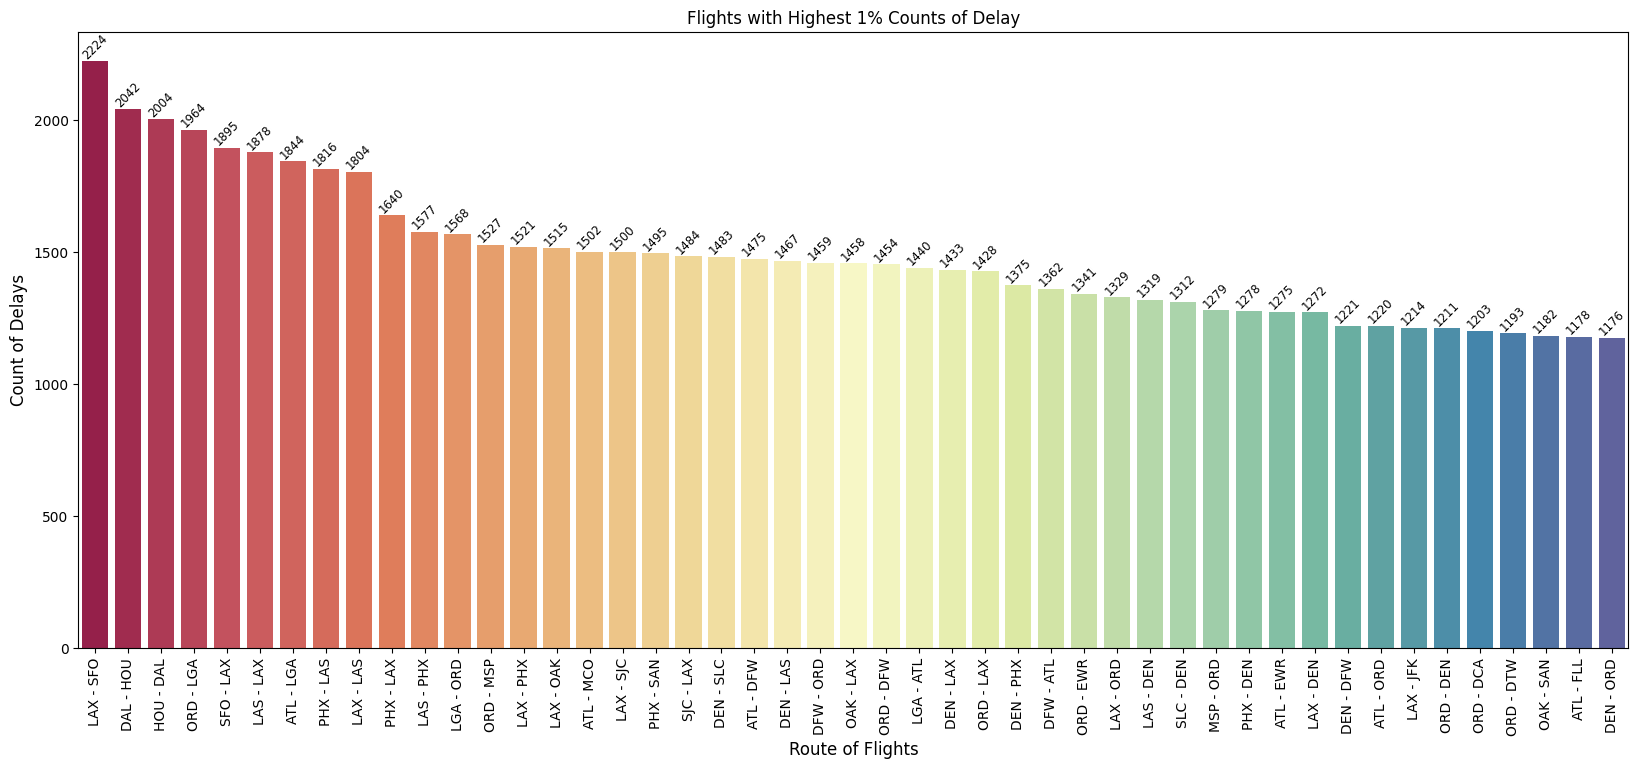

In [ ]:
# set the size of plot
plt.figure(figsize=(20, 8))

# make barplot and sort bars
p1 = sns.barplot(x = 'Origin_Dest',
                 y = 'DelayCount',
                 data = top_1_data,
                 palette = 'Spectral')

# add labels and title
plt.xlabel("Route of Flights", size = 12)
plt.xticks(rotation = 90, size = 10)
plt.ylabel("Count of Delays", size = 12)
plt.title("Flights with Highest 1% Counts of Delay")

for i, v in enumerate(top_1_data['DelayCount']):
    plt.text(i, v, str(v), size = 'small', ha = 'center', va = 'bottom', rotation = 45)

In [ ]:
# To find out the flight with highest average time of delay
# Compare within 'AvgDelayTime' at least 2 hours (120 minutes)

# select the relevant columns
avg = data[['Origin_Dest','AvgDelayTime']]

# select rows with 'AvgDelayTime' at least 120 minutes
filtered_avg = avg[avg['AvgDelayTime'] >= 120]
filtered_avg

,Origin_Dest,AvgDelayTime
286,ATW - DSM,185.00
301,AUS - DSM,129.00
920,CMX - MSP,135.54
1541,EGE - MIA,191.79
1689,FCA - MSP,132.20
1872,HDN - LGA,143.50
1890,HNL - MSP,142.32
1973,IAD - DCA,140.00
2535,LEX - MEM,130.00
2657,MBS - MSP,368.00


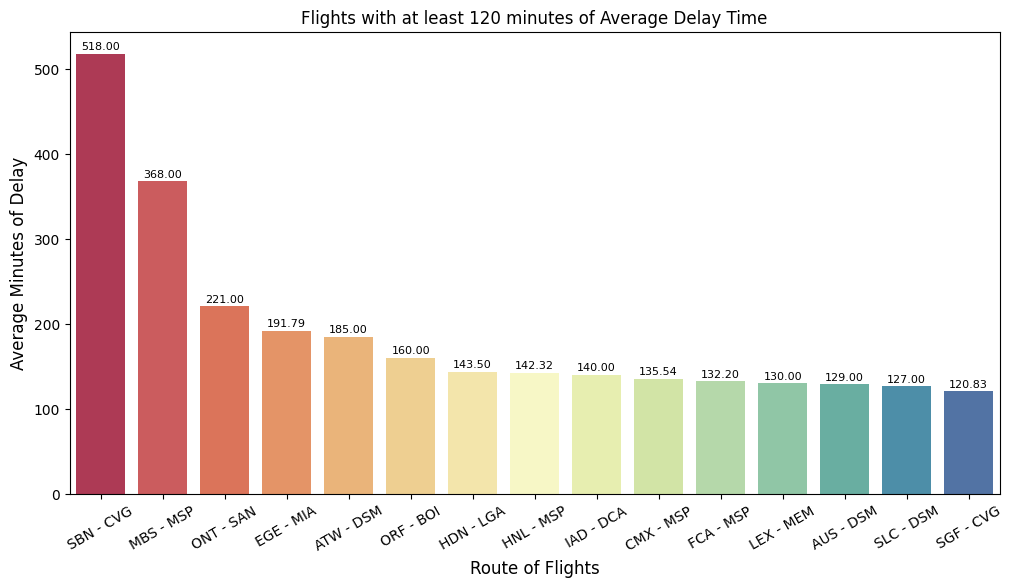

In [ ]:
# set the size of plot
plt.figure(figsize=(12, 6))

# sort the routes for ordered bars
order = filtered_avg.sort_values('AvgDelayTime',ascending = False).Origin_Dest
# make barplot and sort bars
p2 = sns.barplot(x = 'Origin_Dest',
                 y = 'AvgDelayTime',
                 data = filtered_avg,
                 order = order,
                 palette = 'Spectral')

# add labels and title
plt.xlabel("Route of Flights", size = 12)
plt.xticks(rotation = 30)
plt.ylabel("Average Minutes of Delay", size = 12)
plt.title("Flights with at least 120 minutes of Average Delay Time")

for bar in p2.patches:
    p2.annotate(format(bar.get_height(), '.2f'),
     (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                ha = 'center', va = 'center', size = 8, xytext = (0, 5),
                textcoords = 'offset points')

From the graphs, most delays occur for the flight from 'LAX' to 'SFO' with 2224 times while the flight route 'SBN - CVG' recorded the highest average delay of 518.00 minutes.

###8.b) Frequently cancelled flight


```
cancelled_data = LOAD '/user/maria_dev/Assignment2/cancelled.csv' USING PigStorage(',') AS (
    Year: int,
    Month: int,
    DayofMonth: int,
    DayOfWeek: int,
    DepTime: int,
    CRSDepTime: int,
    ArrTime: int,
    CRSArrTime: int,
    UniqueCarrier: chararray,
    FlightNum: int,
    TailNum: chararray,
    ActualElapsedTime: int,
    CRSElapsedTime: int,
    AirTime: int,
    ArrDelay: int,
    DepDelay: int,
    Origin: chararray,
    Dest: chararray,
    Distance: int,
    TaxiIn: int,
    TaxiOut: int,
    Cancelled: int,
    CancellationCode: chararray,
    Diverted: int,
    CarrierDelay: int,
    WeatherDelay: int,
    NASDelay: int,
    SecurityDelay: int,
    LateAircraftDelay: int
);

-- Group flights by FlightNum, Origin, and Dest, and calculate cancellation count
flight_counts = GROUP cancelled_data BY (Origin, Dest);
flight_cancellation_counts = FOREACH flight_counts GENERATE group.Origin AS Origin, group.Dest AS Dest, COUNT(cancelled_data) AS CancelCount;

-- Rank the flights based on cancellation count
ranked_flights = RANK flight_cancellation_counts BY CancelCount DESC;

-- Display the flights that are most frequently cancelled
DESCRIBE cancelled_data;
DUMP ranked_flights;


-- Store the result in a CSV file
STORE ranked_flights INTO '/user/maria_dev/Assignment2/Q8b.csv' USING PigStorage(',');
```



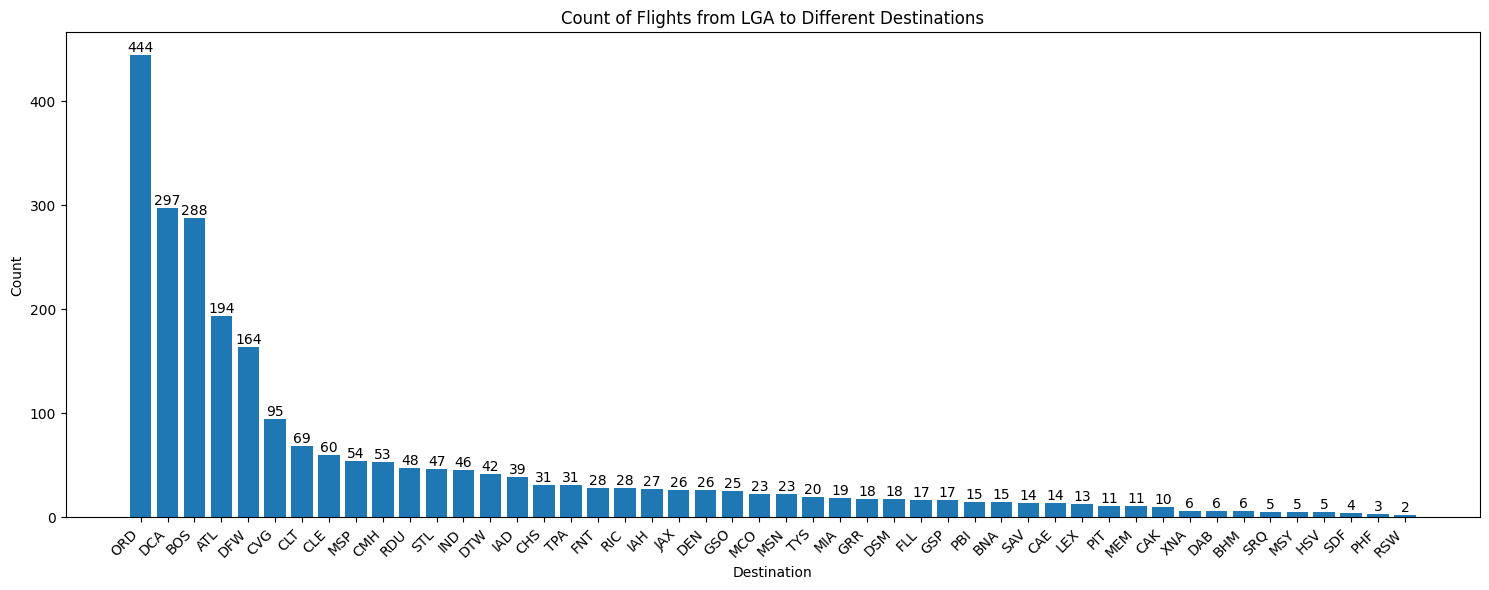

Total count of Flights from LGA to Different Destinations:  2462 flights


In [ ]:
#LOAD the data --  Q8_Output.csv

#8.b) flight that frequenly cancelled
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a pandas DataFrame
data = pd.read_csv('/content/drive/MyDrive/SEMESTER 2/DATA MANAGEMENT/Assignment2/Question2/Q8_Output.csv', header=None)

# Rename the column names
data = data.rename(columns={0: 'Index',1: 'Origin', 2: 'Destination', 3: 'Count'})

# Remove the last row with index 3895- no use
data = data.drop(3895)

#Create the DataFrame
df_8=pd.DataFrame(data)
df_8.head(6)

# Filter the DataFrame for a specific / highest origin
origin = 'LGA'
filtered_data = data[data['Origin'] == origin]

# Plotting the filtered data
plt.figure(figsize=(15, 6))  # Adjust the figure size as needed
plt.bar(filtered_data['Destination'], filtered_data['Count'])
plt.xlabel('Destination')
plt.ylabel('Count')
plt.title(f'Count of Flights from {origin} to Different Destinations')

plt.xticks(rotation=45, ha='right')  # Rotate and align the x-axis labels

# Add count labels on top of each bar
for i, v in enumerate(filtered_data['Count']):
    plt.text(i, v, str(v), ha='center', va='bottom')

#tight_layout() adjusts the subplot parameters to fit the plot
#contents within the figure area.
plt.tight_layout()  # Ensure labels are not cut off
plt.show()

#to get the total number of origin LGA to different destination
LGA_sum = df_8[df_8["Origin"] == "LGA"]["Count"].sum()
print("Total count of Flights from LGA to Different Destinations: ",LGA_sum,"flights")

In [ ]:
df_8.head(6)

,Index,Origin,Destination,Count
0,1,LGA,ORD,444
1,2,ORD,LGA,430
2,3,DCA,LGA,304
3,4,LGA,DCA,297
4,5,LGA,BOS,288
5,6,BOS,LGA,286


 Based on the figure above, it is found that the flight from **Origin "LGA" to Destination "ORD"** has the most frequent number of cancellation with the frequency of **444**. Total count of flights from LGA to different destinations was 2462 flights. The figure also display the top destinations with highest number of cancellation which are ORD, DCA, BOS, ATL and DFW with the count from 280 to 445 times.

#**Conclusion**

---
As an uncontrollable factor, weather condition is weakly related to flight delays but shows greater effect on cancellations. Airline sectors are suggested to take more efforts in improving the human aspects of carrier and late aircraft to reduce delays. The relevant actions should be taken especially for the routes involving large cities with higher chances of delay and cancellation.

There are months of higher demands with better flight experience but unsatisfied airline performance due to bad season leads to drop in flight arrangement as well. Flight business that might be weather-affected can be resolved by increasing and promoting the routes with stable conditions from the weather forecast.

#**Reference**
---

*Understanding the Reporting of Causes of Flight Delays and Cancellations.* (2022, January 10). Retrieved from Bureau of Transportation Statistics: https://www.bts.gov/topics/airlines-and-airports/understanding-reporting-causes-flight-delays-and-cancellations

